In [ ]:
import pandas as pd

df = pd.read_csv("echocardiogram.csv").dropna()
df

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
0,11.00,0.0,71.0,0.0,0.260,9.000,4.600,14.00,1.00,1.000,name,1,0.0
1,19.00,0.0,72.0,0.0,0.380,6.000,4.100,14.00,1.70,0.588,name,1,0.0
2,16.00,0.0,55.0,0.0,0.260,4.000,3.420,14.00,1.00,1.000,name,1,0.0
3,57.00,0.0,60.0,0.0,0.253,12.062,4.603,16.00,1.45,0.788,name,1,0.0
4,19.00,1.0,57.0,0.0,0.160,22.000,5.750,18.00,2.25,0.571,name,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,1.25,1.0,63.0,0.0,0.300,6.900,3.520,18.16,1.51,0.857,name,2,1.0
106,24.00,0.0,59.0,0.0,0.170,14.300,5.490,13.50,1.50,0.643,name,2,0.0
107,25.00,0.0,57.0,0.0,0.228,9.700,4.290,11.00,1.00,0.786,name,2,0.0
109,0.75,1.0,78.0,0.0,0.230,40.000,6.230,14.00,1.40,0.714,name,2,1.0


In [ ]:
target_columns = ['survival', 'alive', 'aliveat1']
feature_columns = [
    'age', 'survival', 'fractionalshortening',
    'epss', 'lvdd', 'wallmotion-score', 'wallmotion-index', 'mult'
]

X = df[feature_columns]
y = df[target_columns]

X

,age,survival,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult
0,71.0,11.00,0.260,9.000,4.600,14.00,1.00,1.000
1,72.0,19.00,0.380,6.000,4.100,14.00,1.70,0.588
2,55.0,16.00,0.260,4.000,3.420,14.00,1.00,1.000
3,60.0,57.00,0.253,12.062,4.603,16.00,1.45,0.788
4,57.0,19.00,0.160,22.000,5.750,18.00,2.25,0.571
...,...,...,...,...,...,...,...,...
105,63.0,1.25,0.300,6.900,3.520,18.16,1.51,0.857
106,59.0,24.00,0.170,14.300,5.490,13.50,1.50,0.643
107,57.0,25.00,0.228,9.700,4.290,11.00,1.00,0.786
109,78.0,0.75,0.230,40.000,6.230,14.00,1.40,0.714


In [ ]:
!pip install umap-learn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.8 MB/s eta 0:00:00


In [ ]:
!pip install trimap --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install pacmap --quiet

In [ ]:
import matplotlib.pyplot as plt


def visualization(X_embedded, title):
    plt.figure(figsize=(10, 6))
    # plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y['alive'], cmap='viridis', alpha=0.7, edgecolors="k")
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], alpha=0.7, edgecolors="k")
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid()
    plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


def funky(method, params, X):
  scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
  }

  for scaler_name, scaler in scalers.items():
    X_scaled = scaler.fit_transform(X)
    for param in params:
      model = method(**param)
      X_embedded = model.fit_transform(X_scaled)
      visualization(X_embedded, f"{method.__name__} with {scaler_name} - params: {param}")

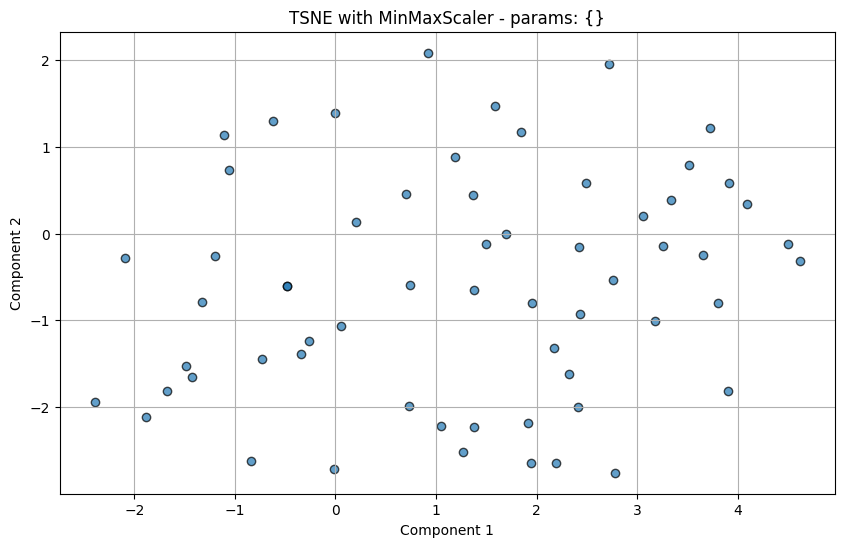

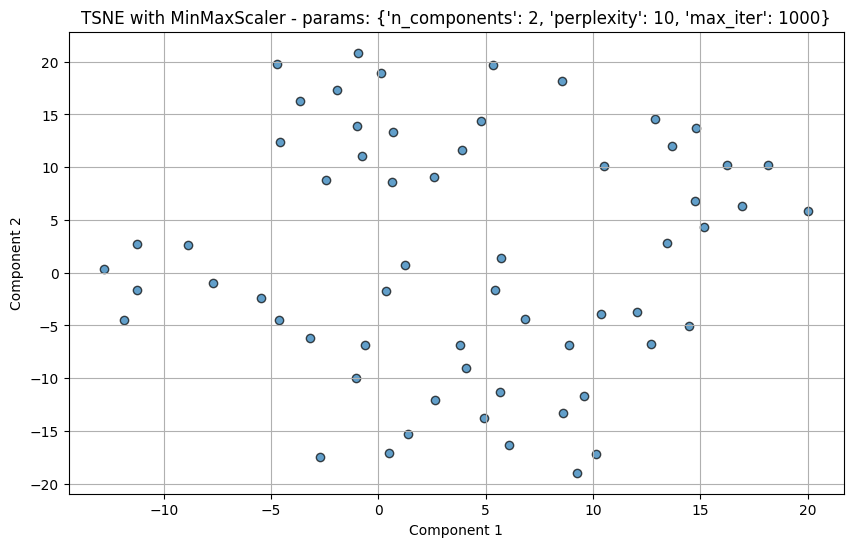

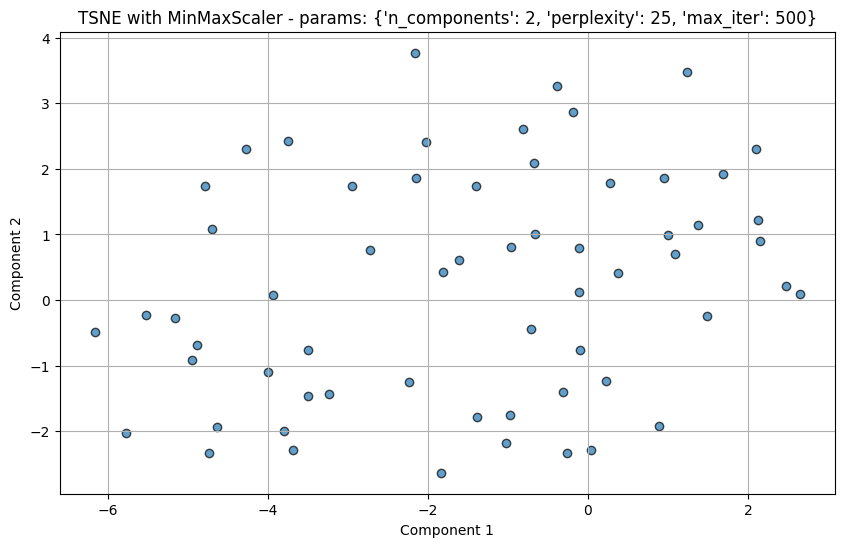

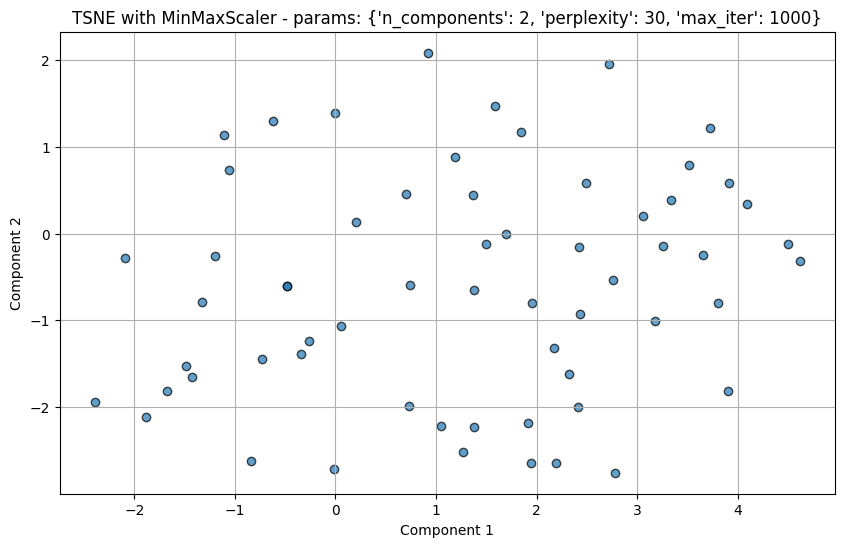

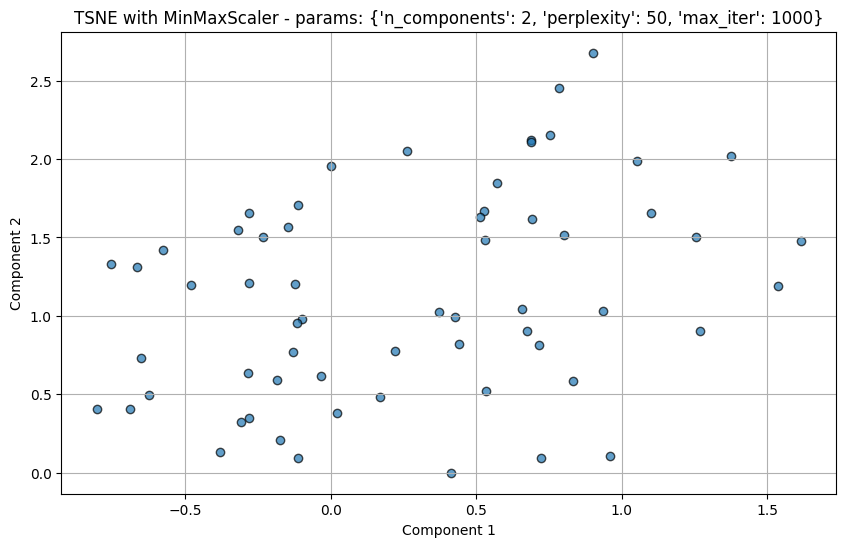

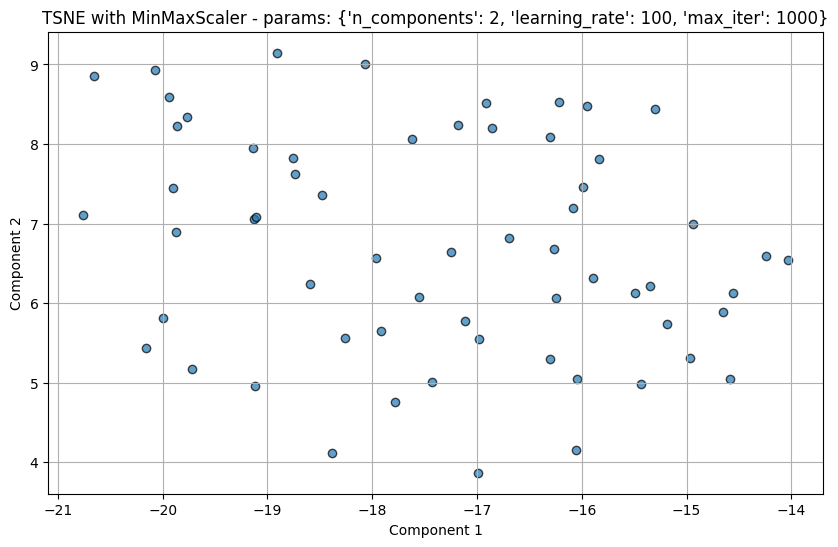

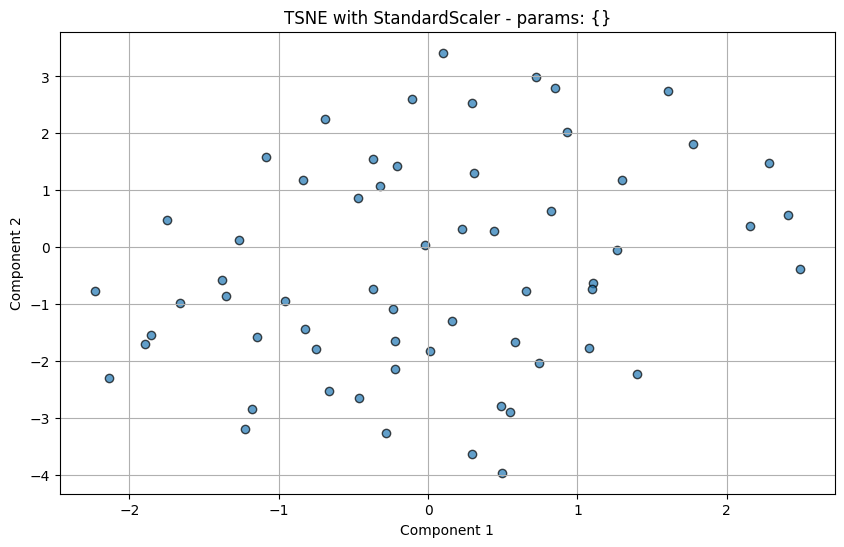

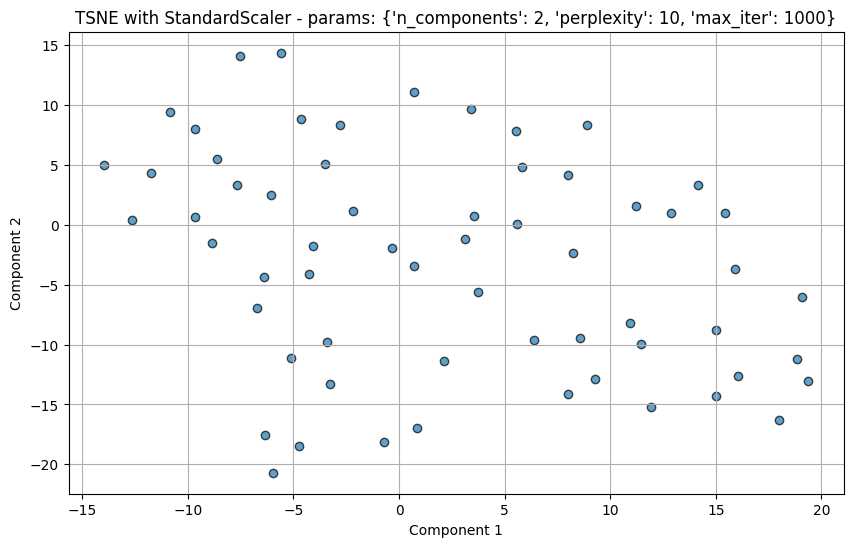

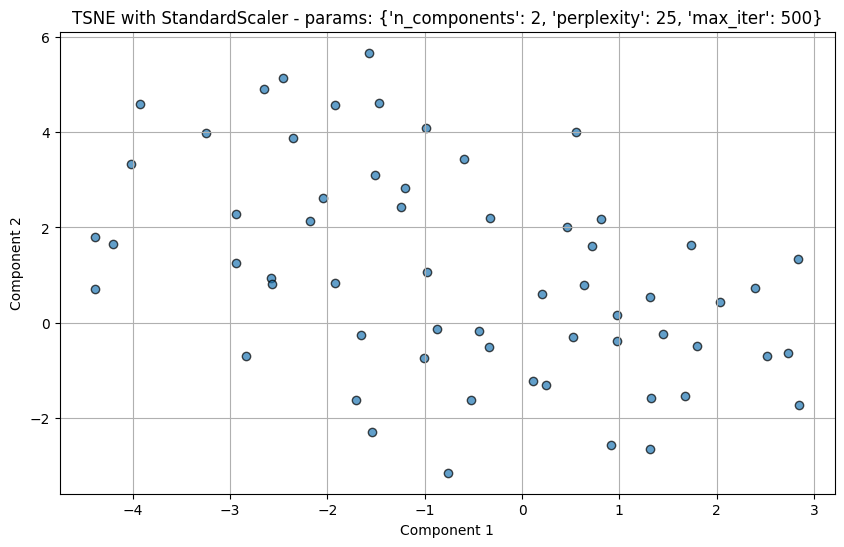

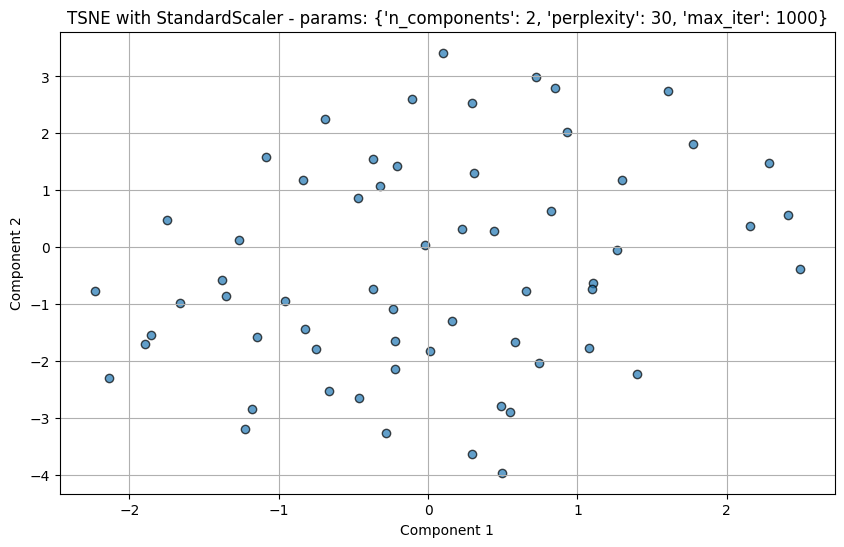

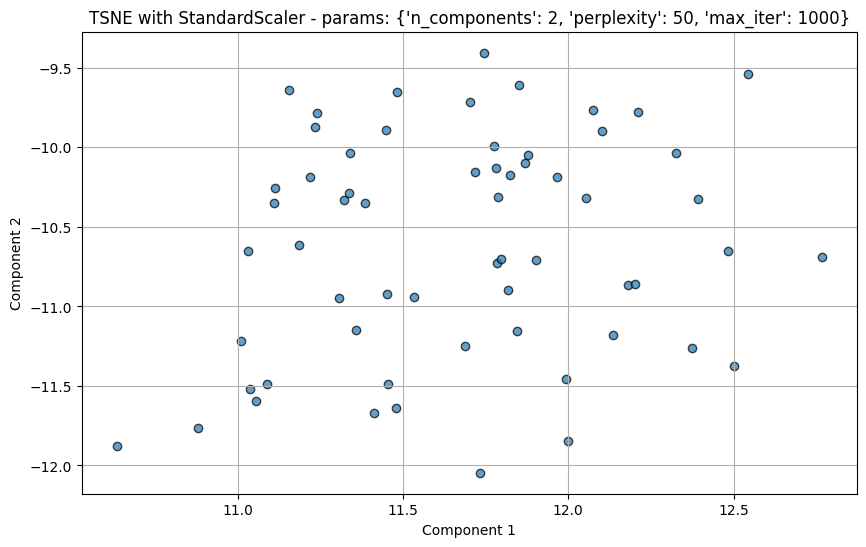

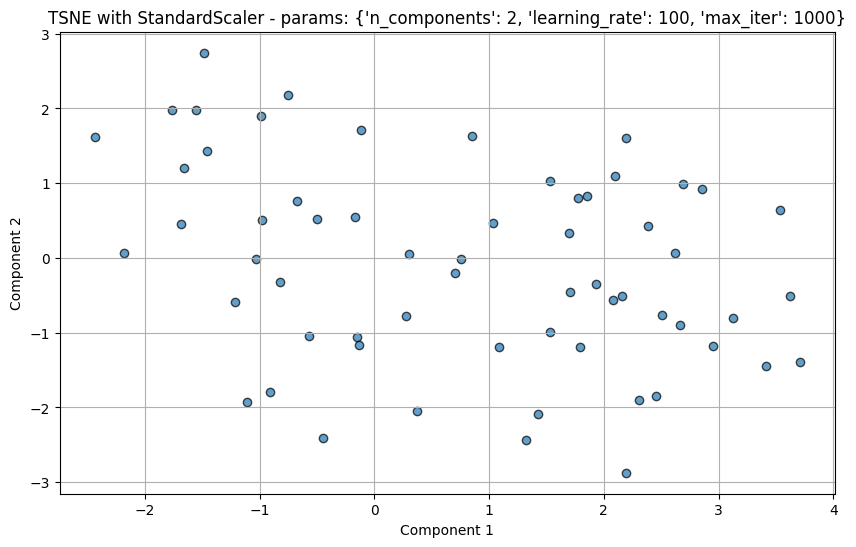

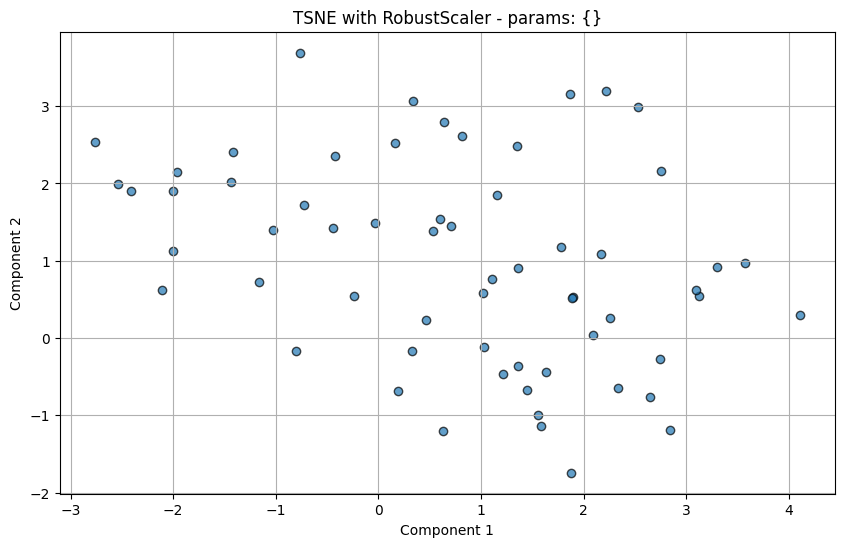

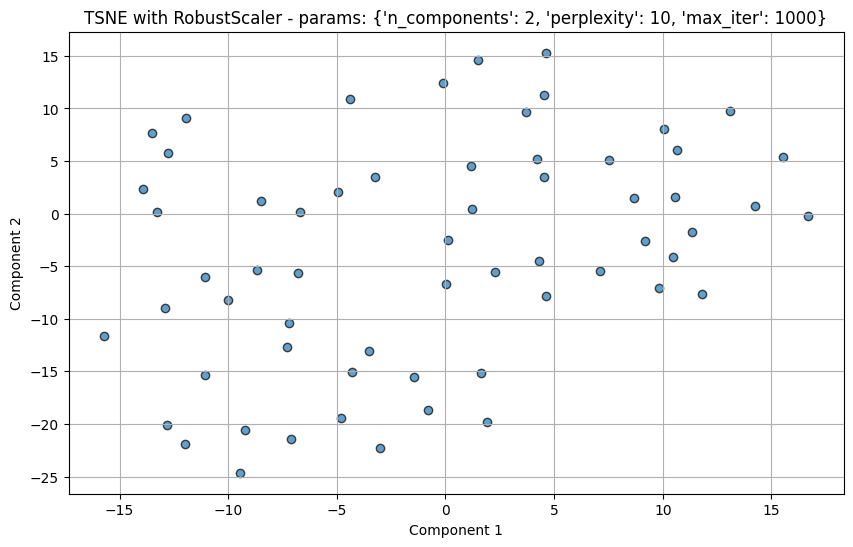

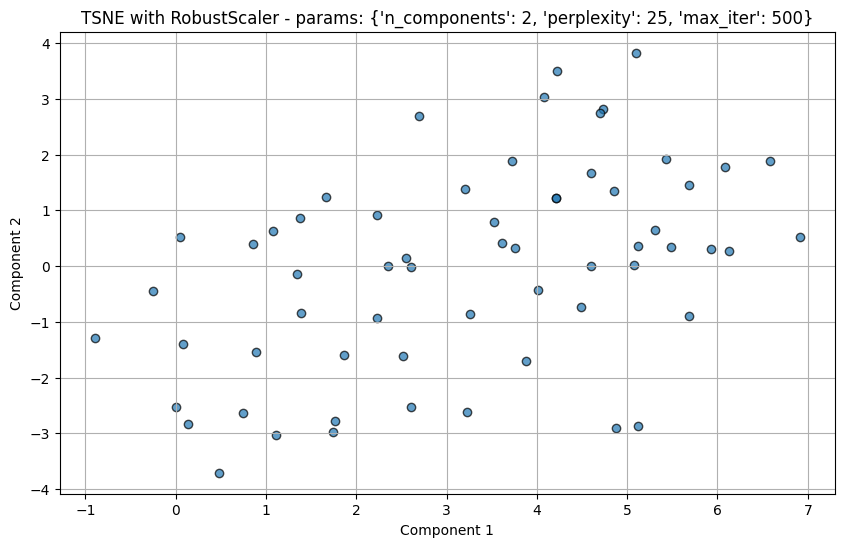

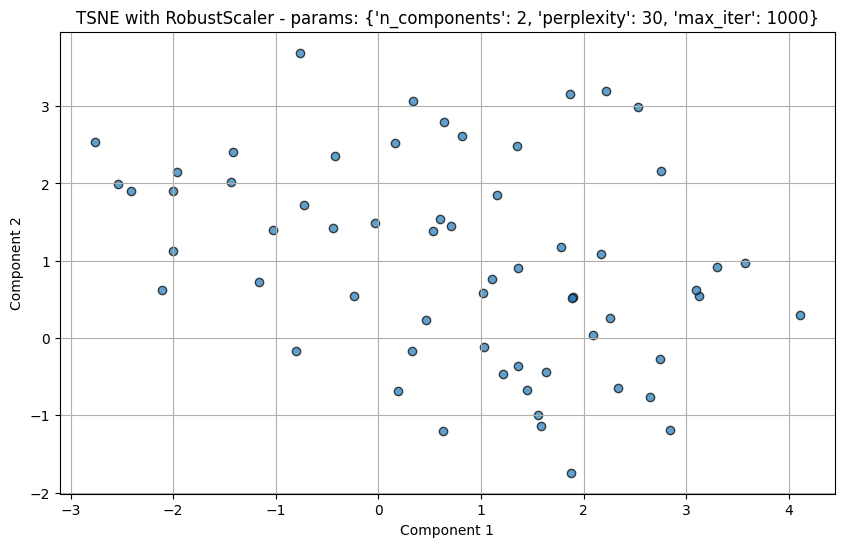

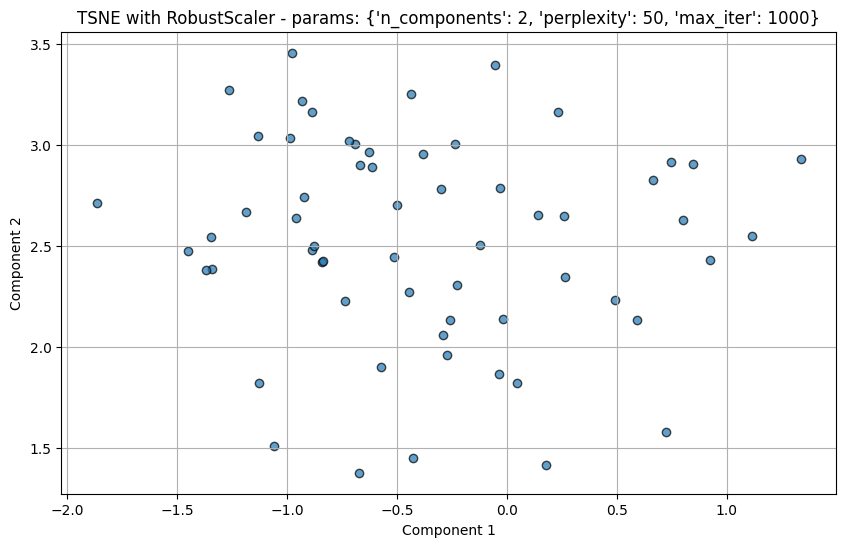

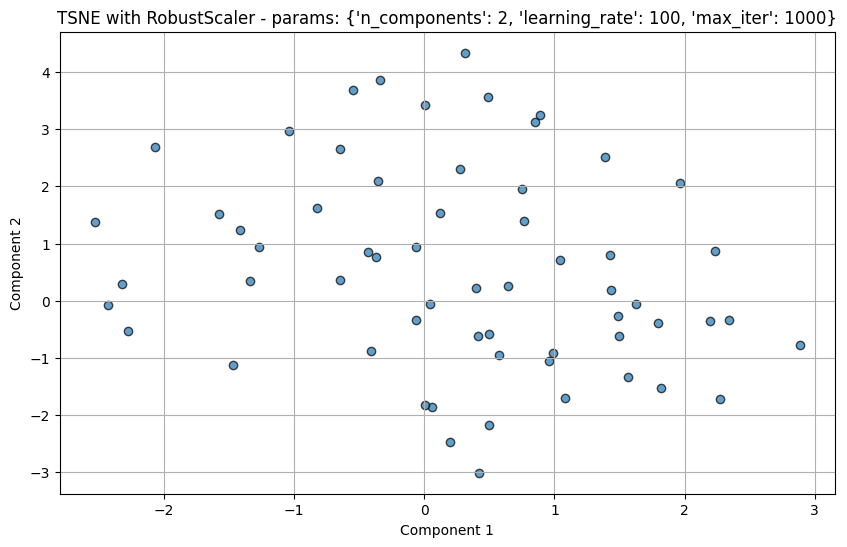

In [ ]:
from sklearn.manifold import TSNE


params = [
    {},  # Параметры по умолчанию
    {"n_components": 2, "perplexity": 10, "max_iter": 1000},
    {"n_components": 2, "perplexity": 25, "max_iter": 500},
    {"n_components": 2, "perplexity": 30, "max_iter": 1000},
    {"n_components": 2, "perplexity": 50, "max_iter": 1000},
    {"n_components": 2, "learning_rate": 100, "max_iter": 1000},
]
funky(TSNE, params, X)

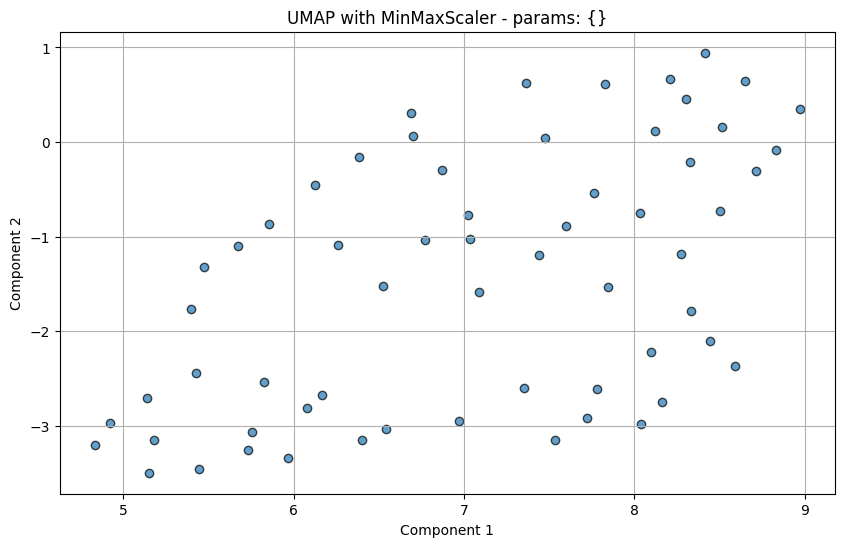

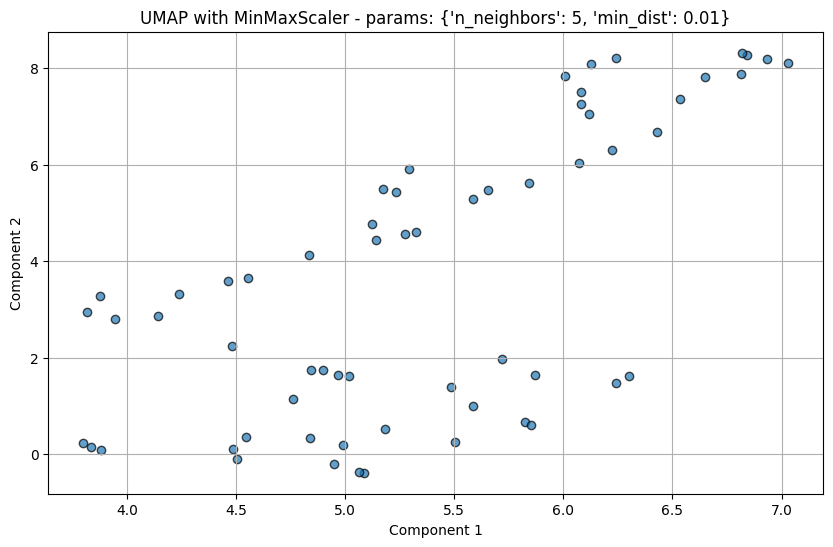

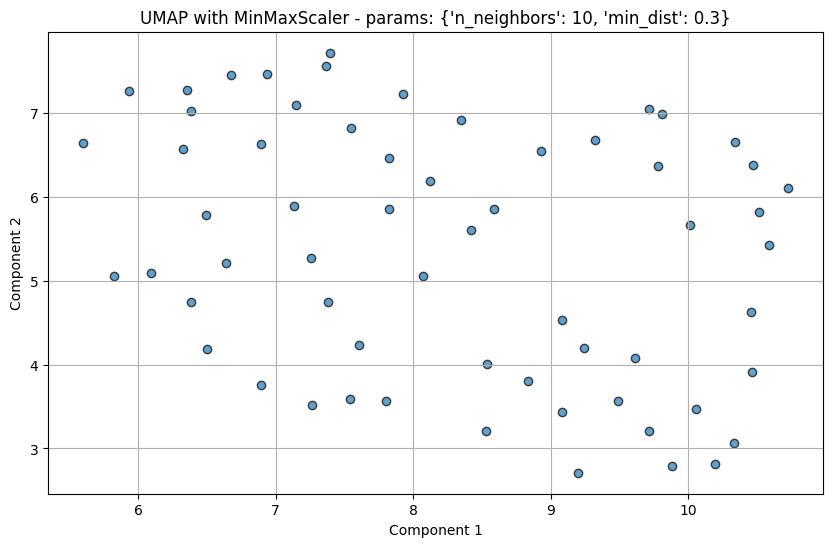

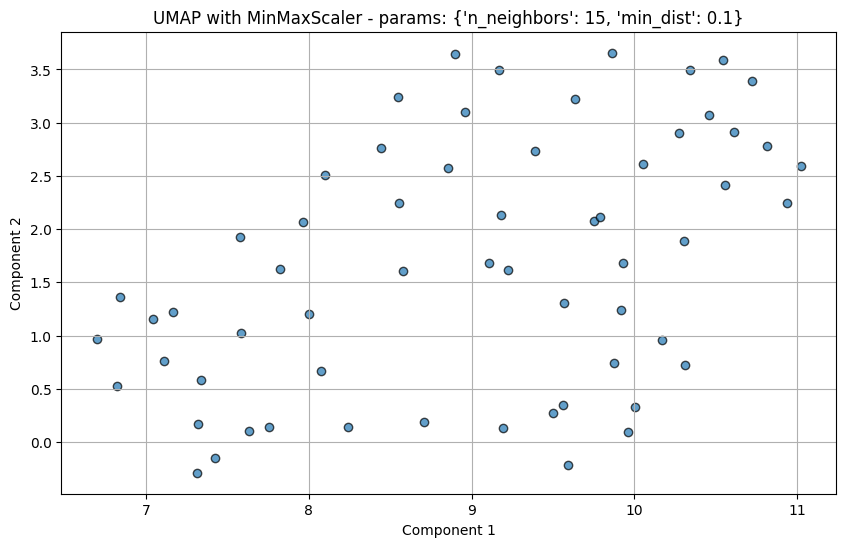

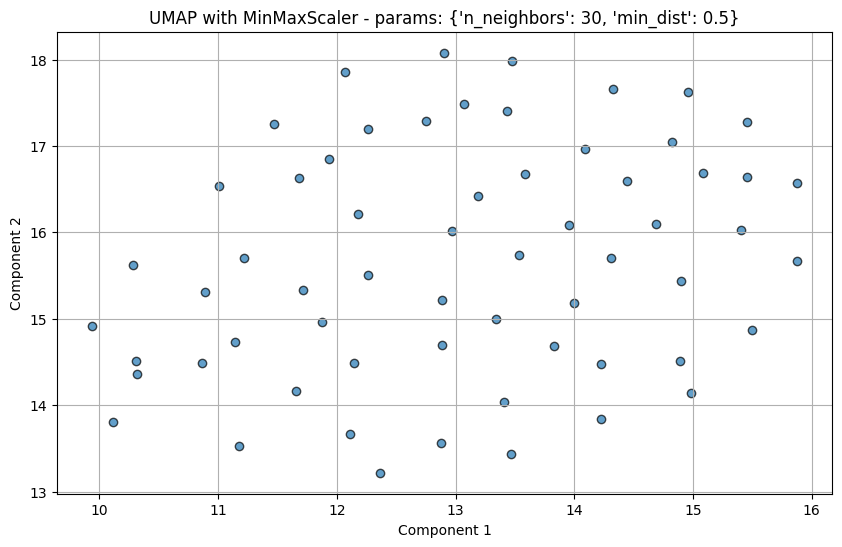

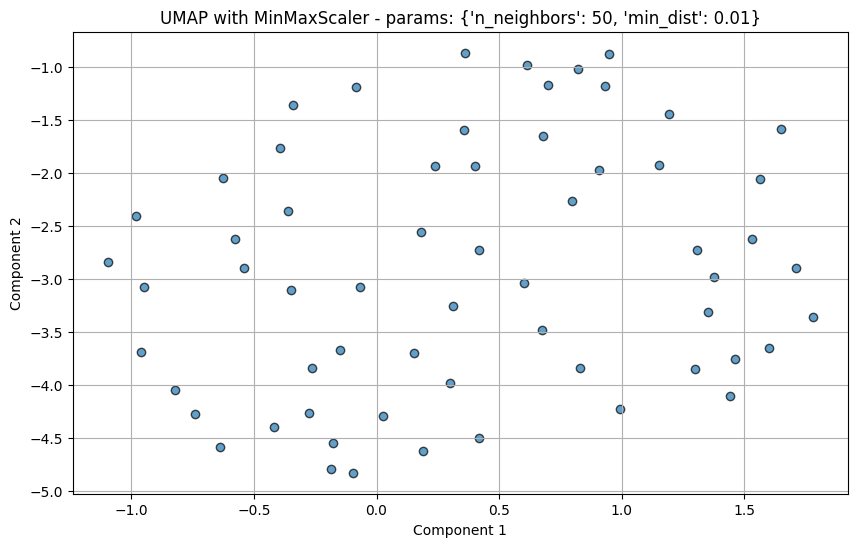

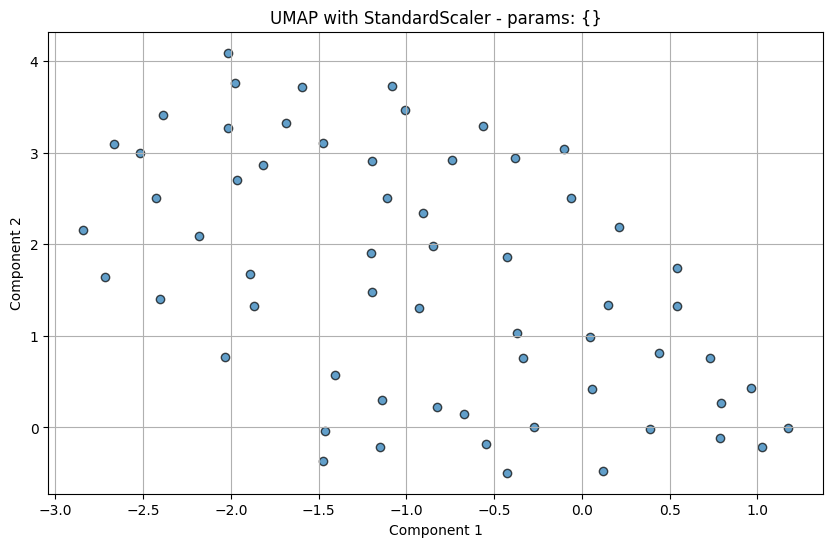

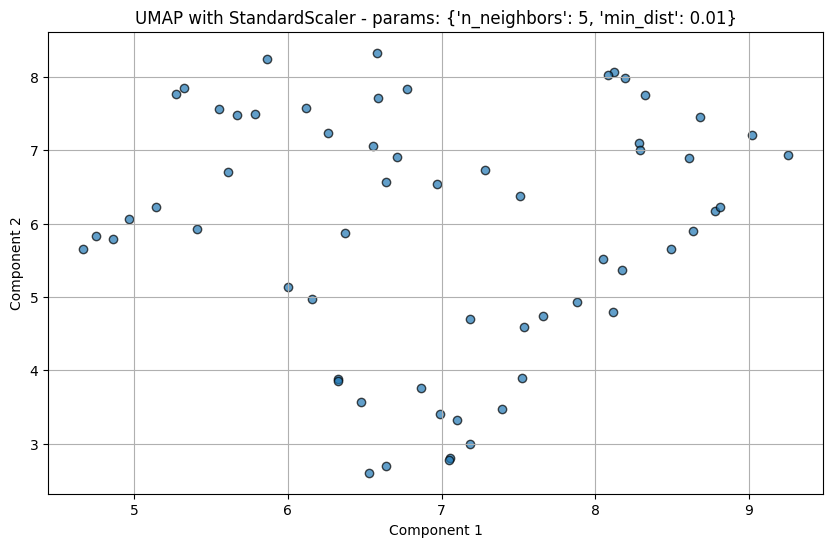

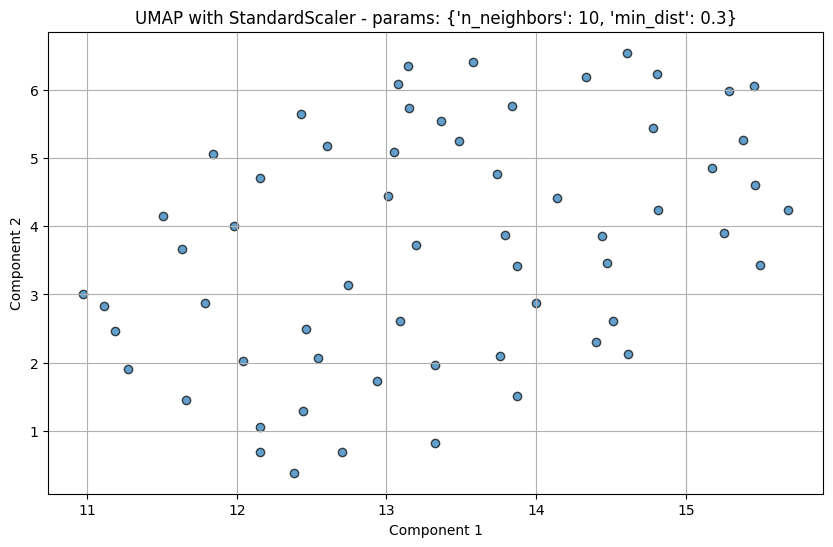

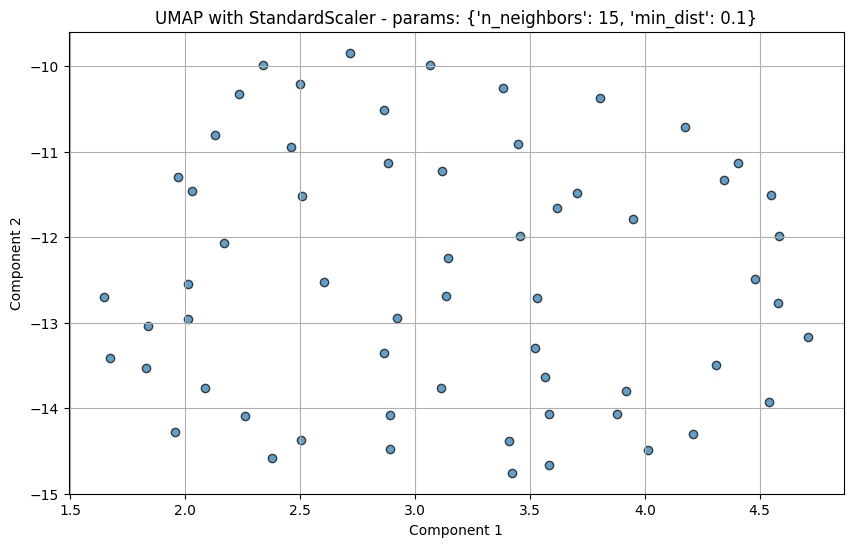

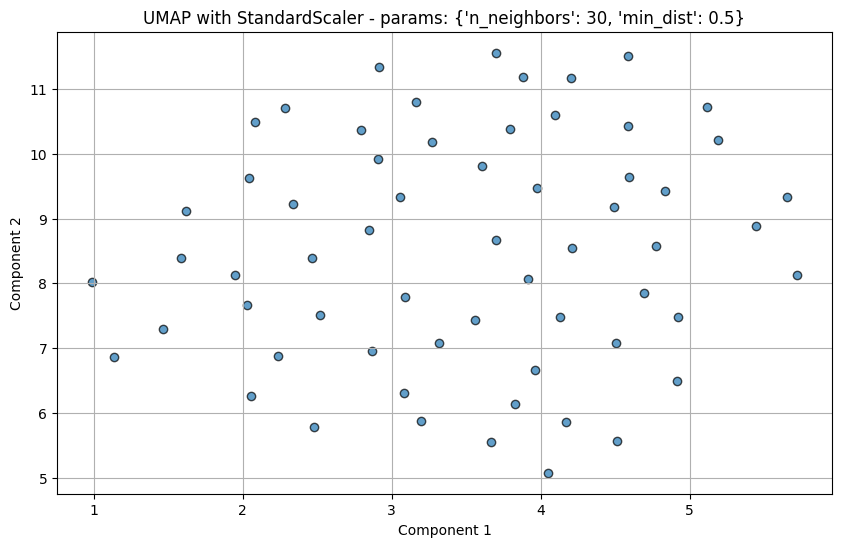

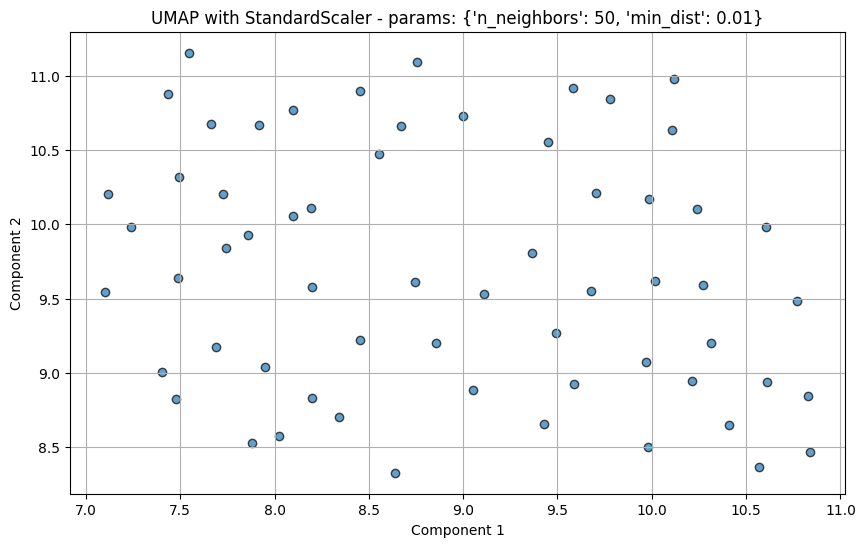

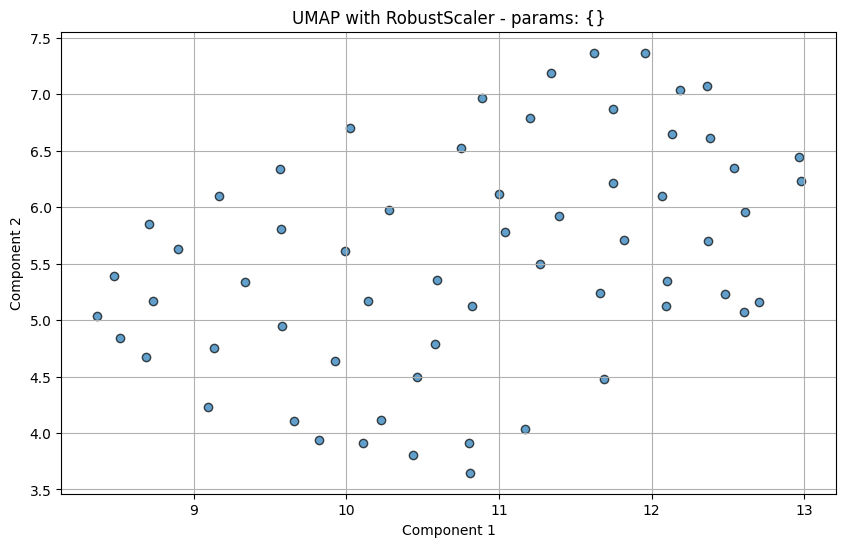

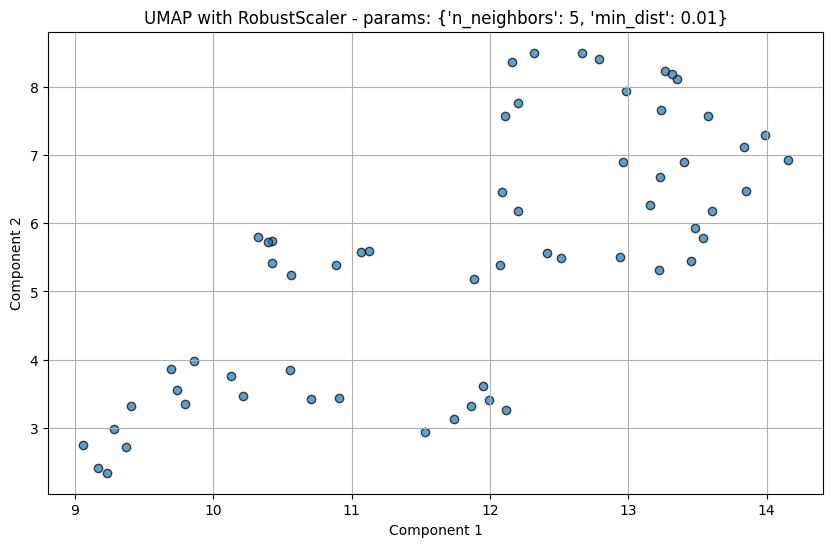

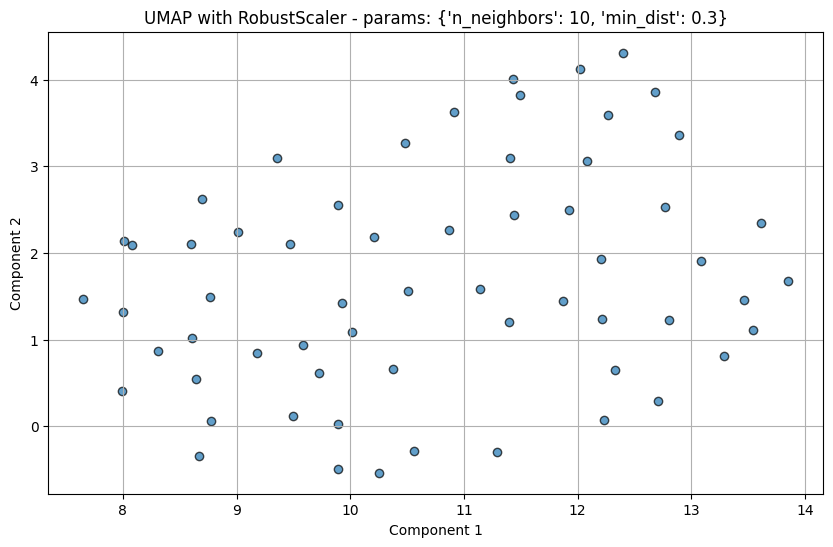

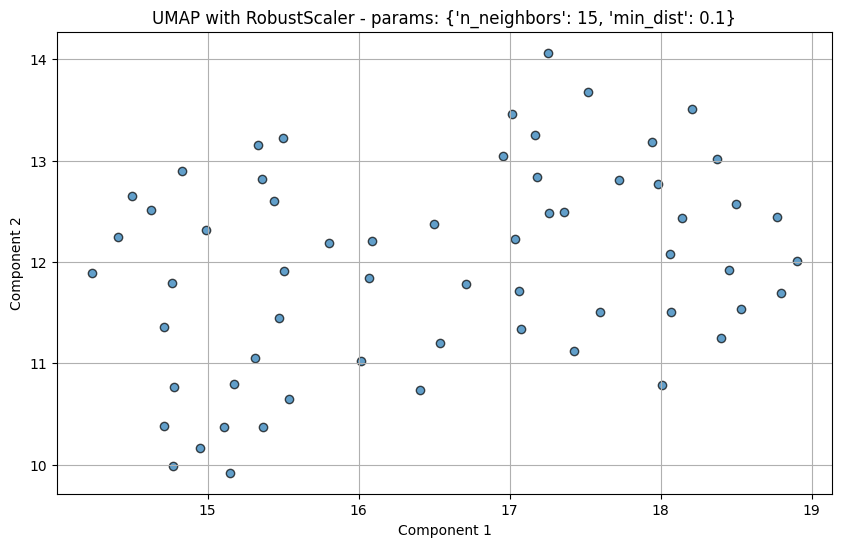

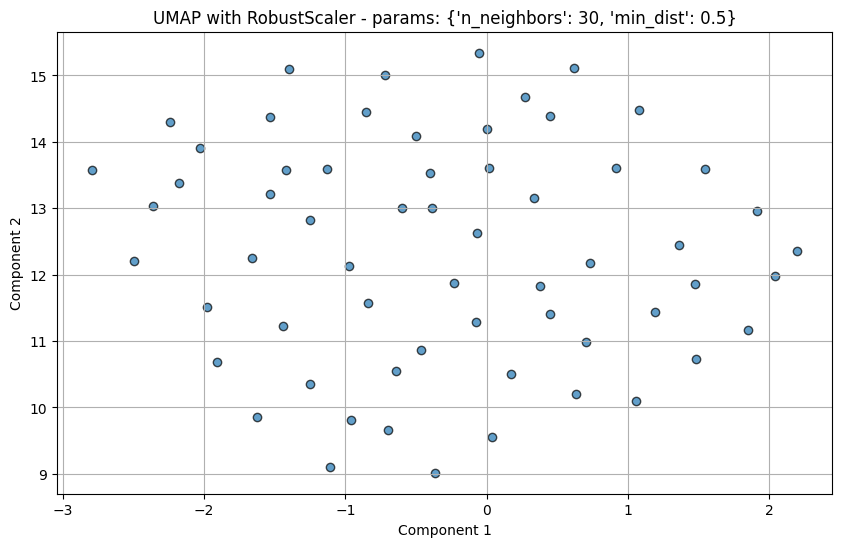

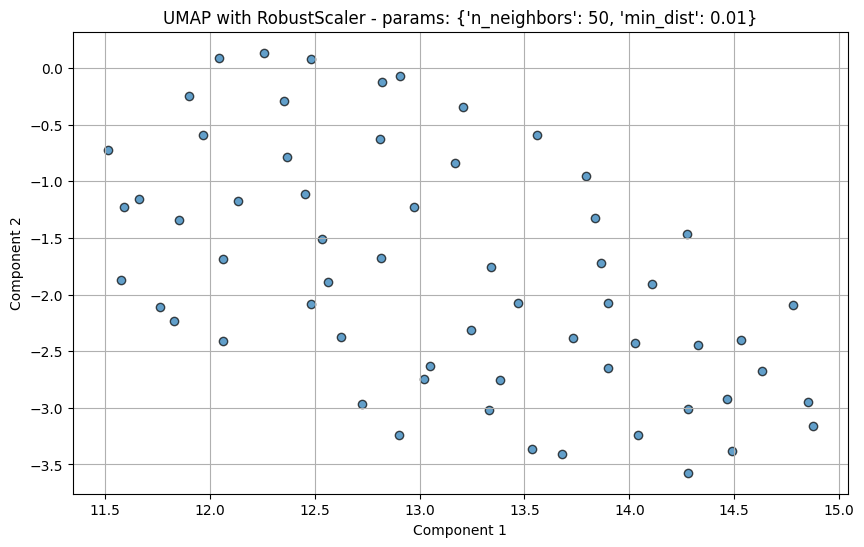

In [ ]:
from umap import UMAP


params = [
    {},  # Параметры по умолчанию
    {"n_neighbors": 5, "min_dist": 0.01},
    {"n_neighbors": 10, "min_dist": 0.3},
    {"n_neighbors": 15, "min_dist": 0.1},
    {"n_neighbors": 30, "min_dist": 0.5},
    {"n_neighbors": 50, "min_dist": 0.01},
]
funky(UMAP, params, X)

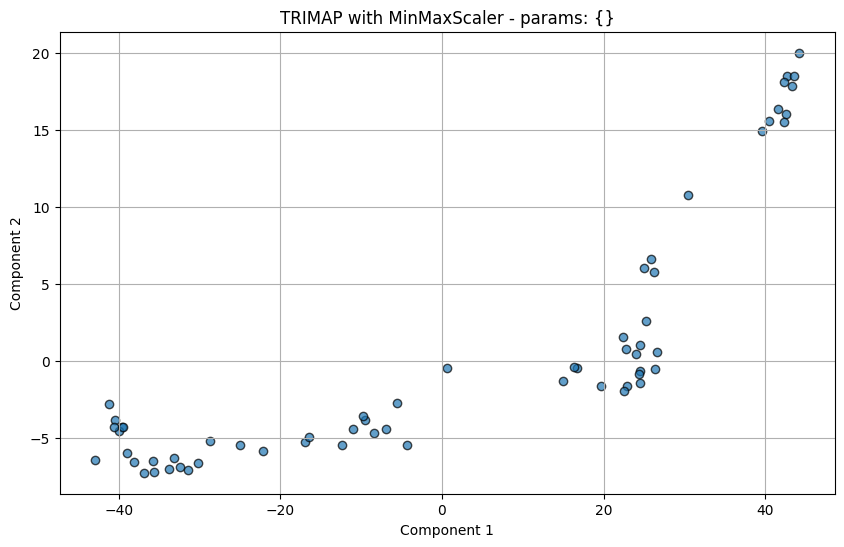

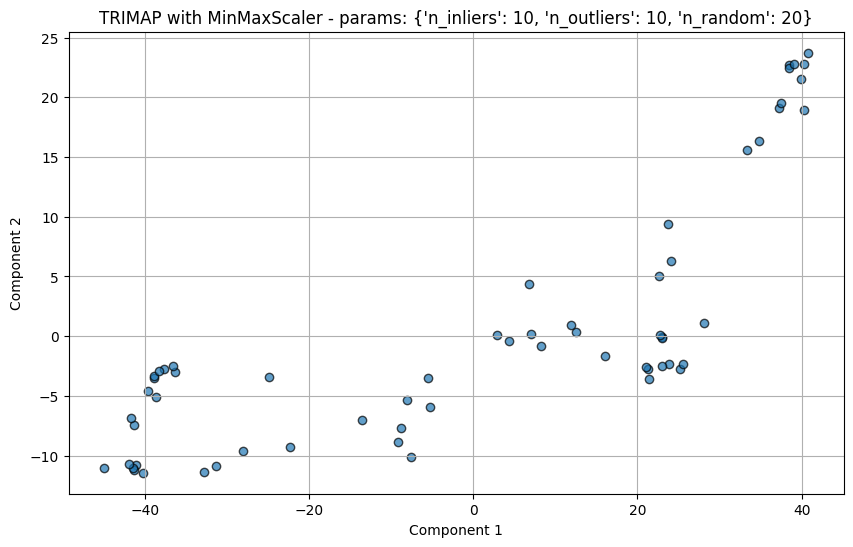

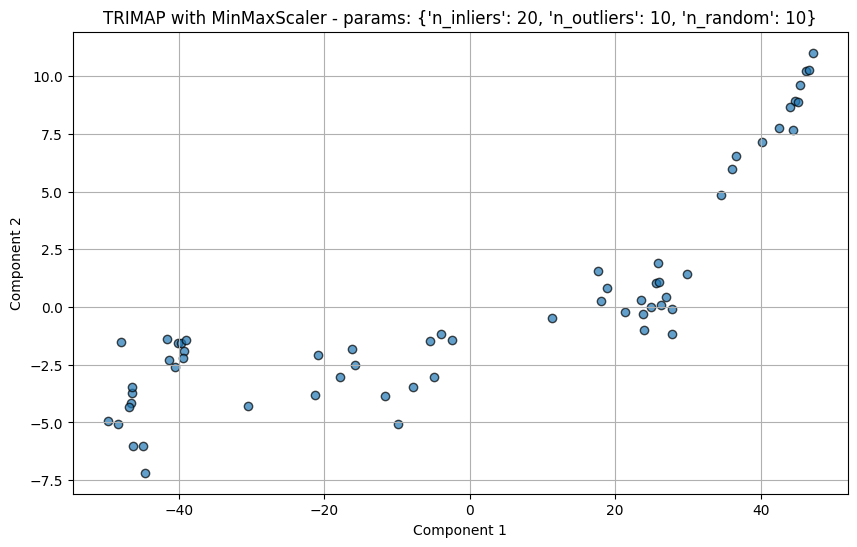

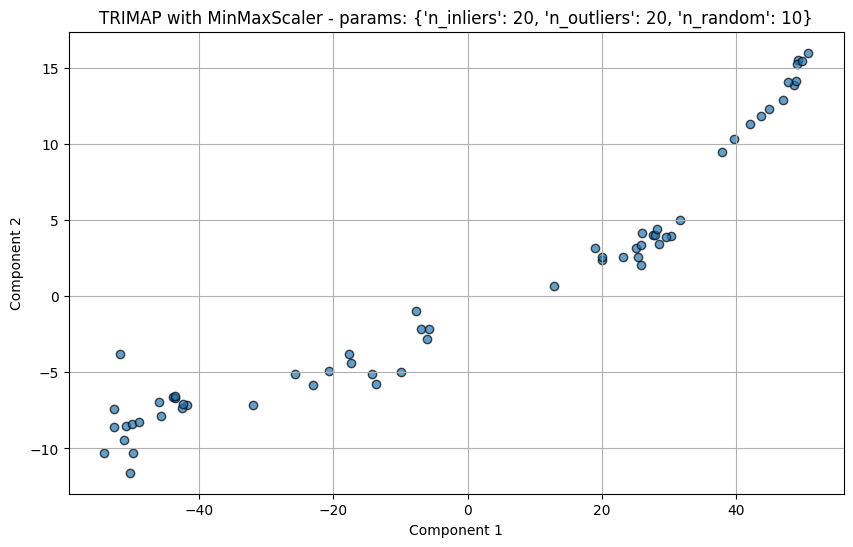

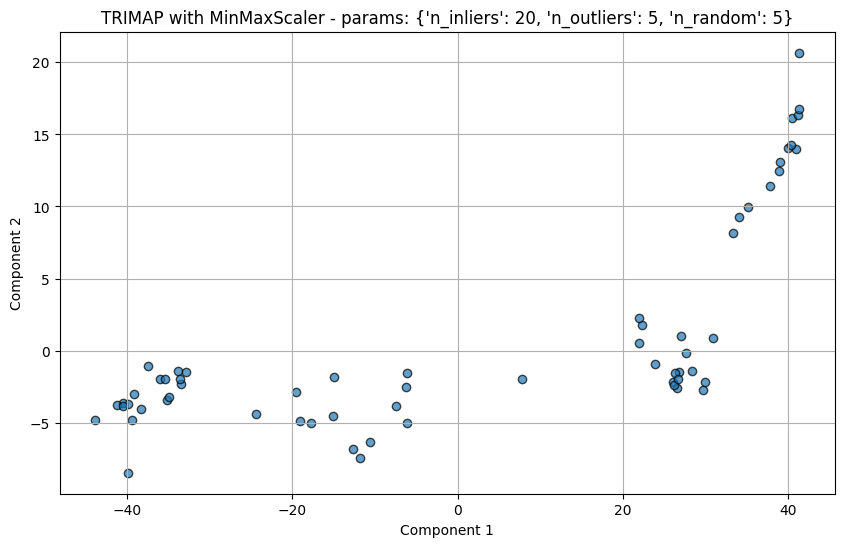

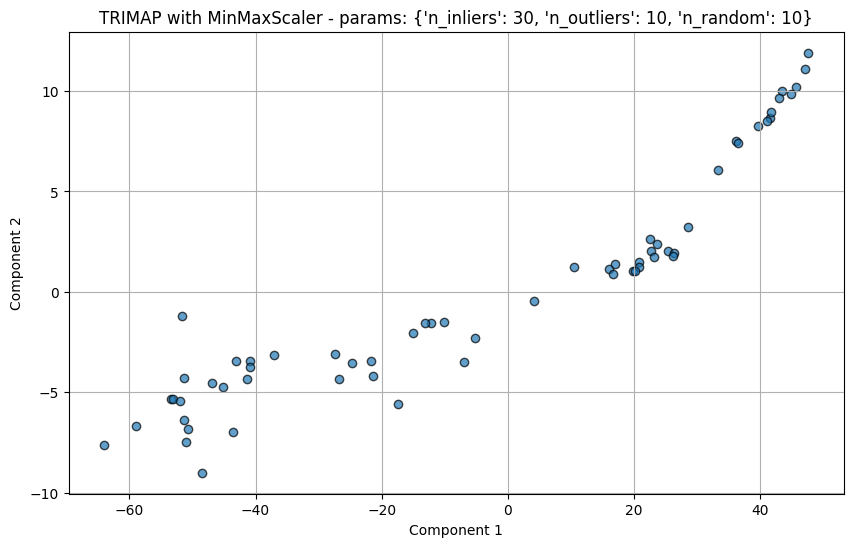

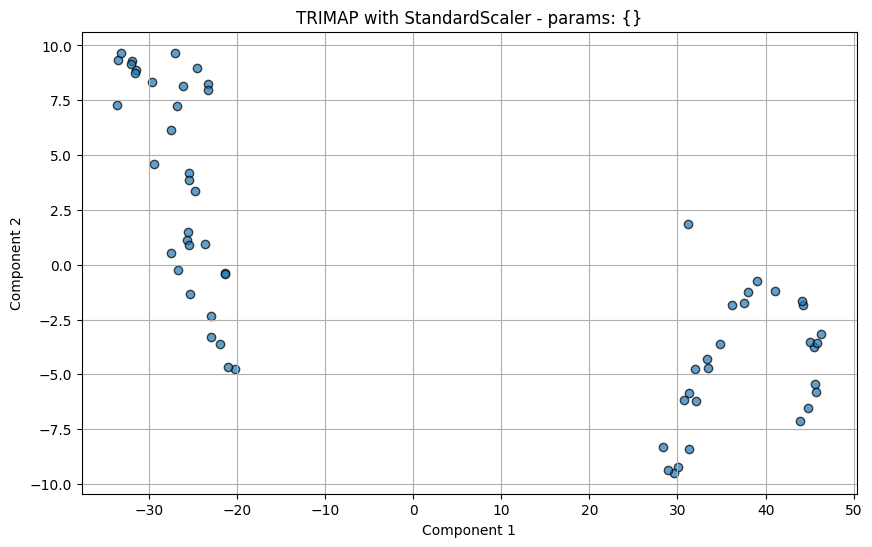

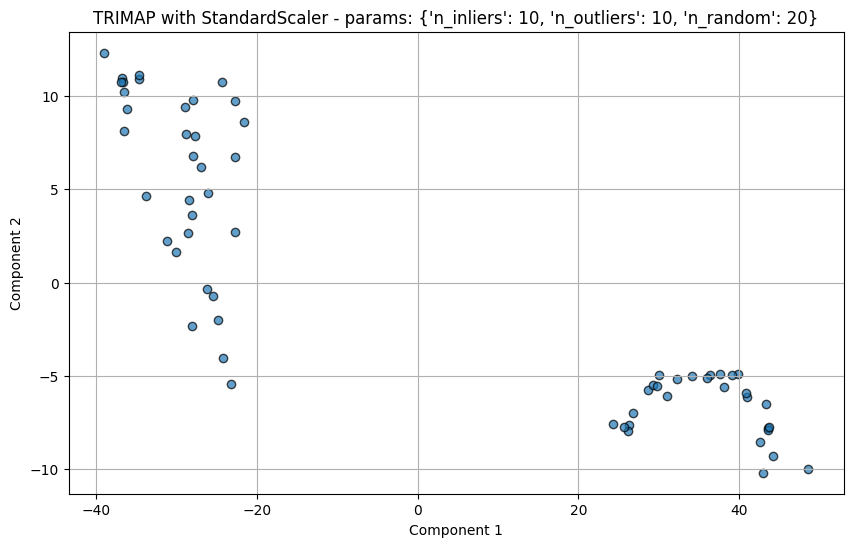

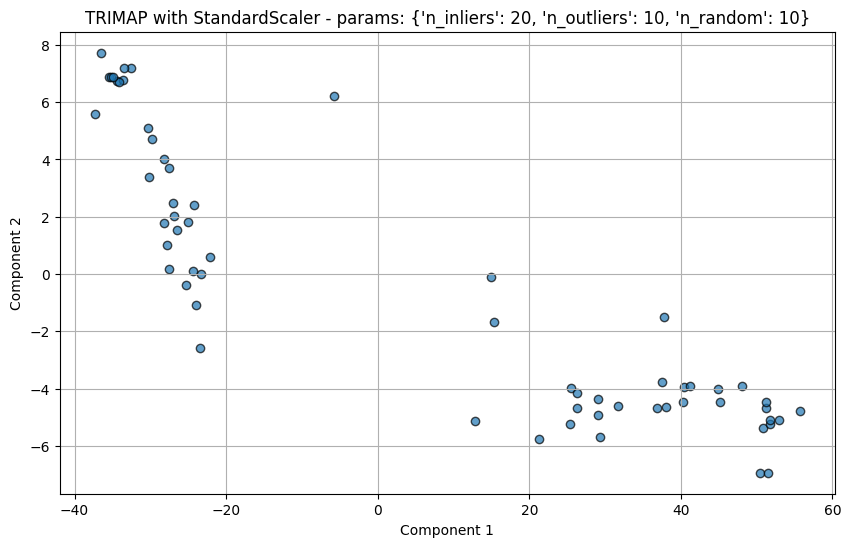

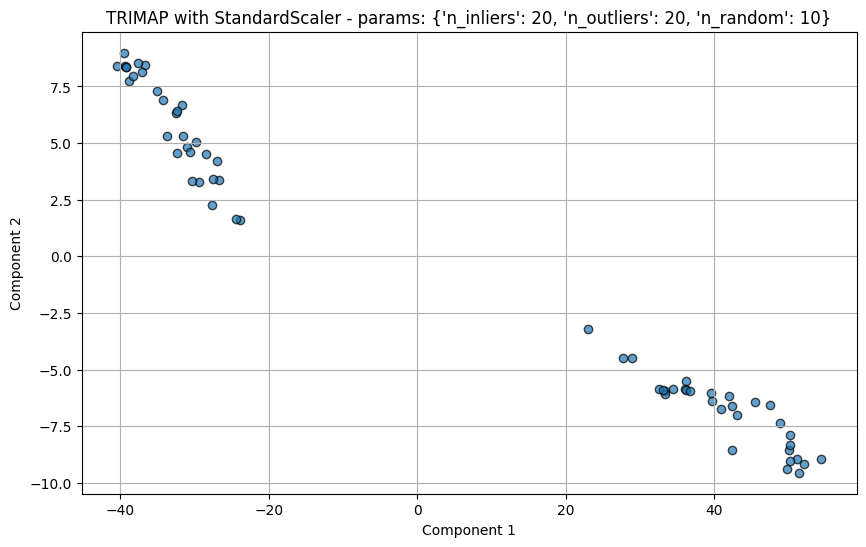

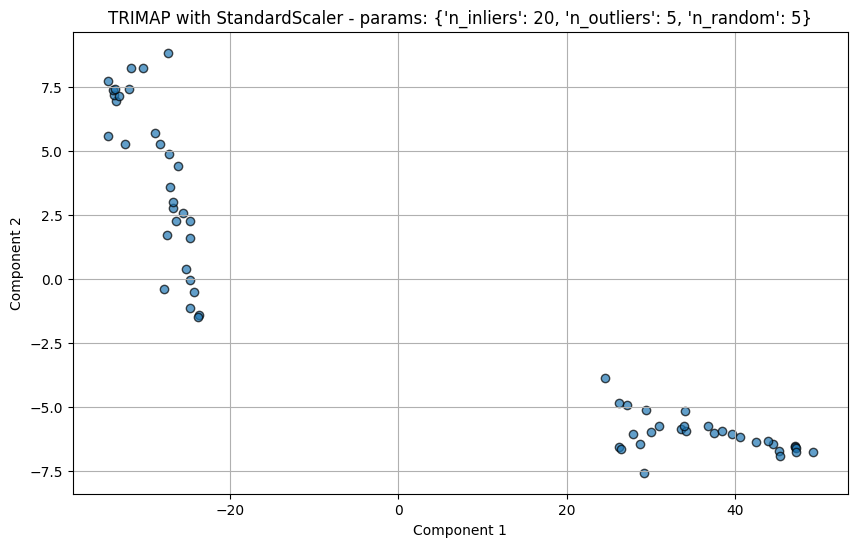

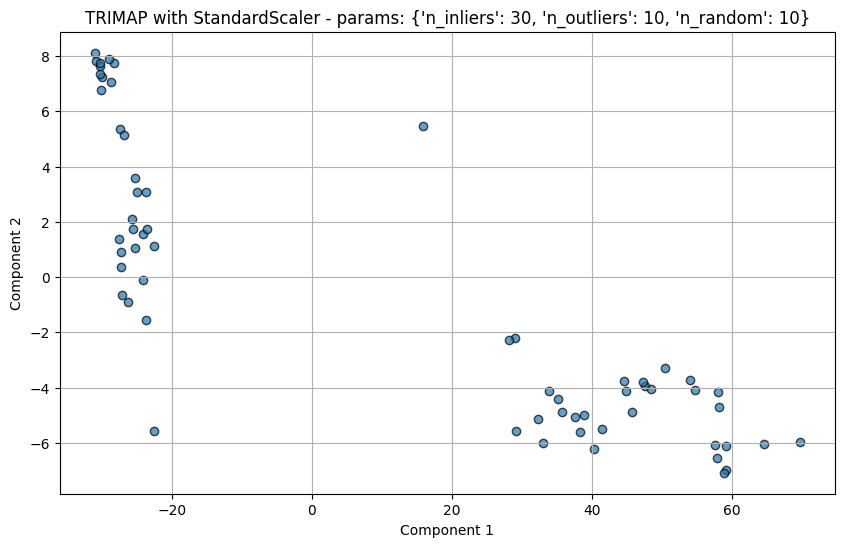

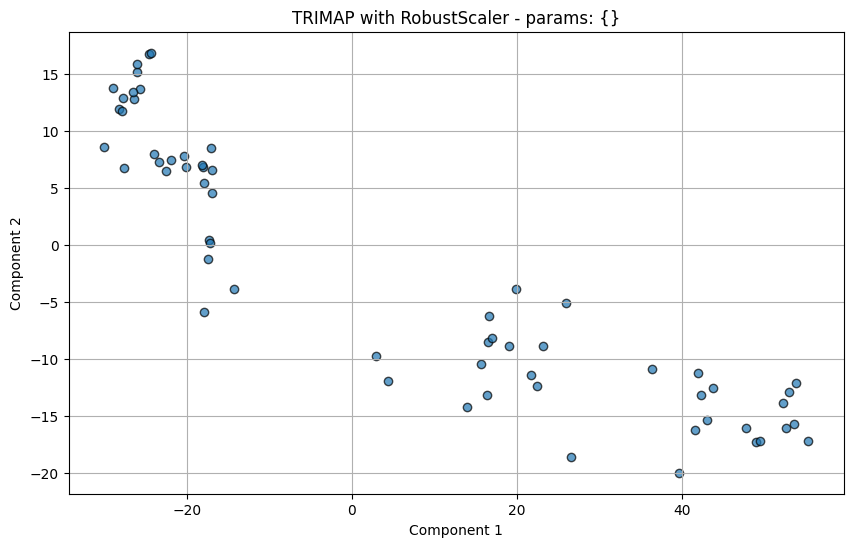

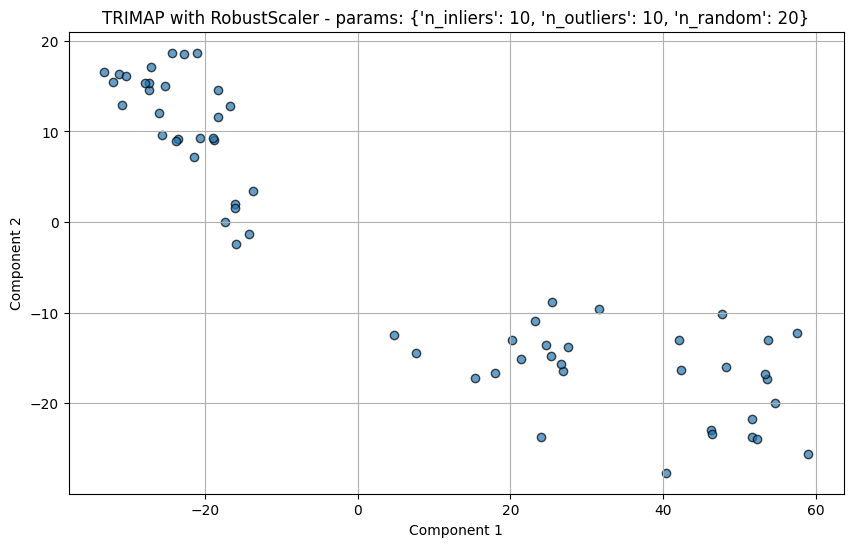

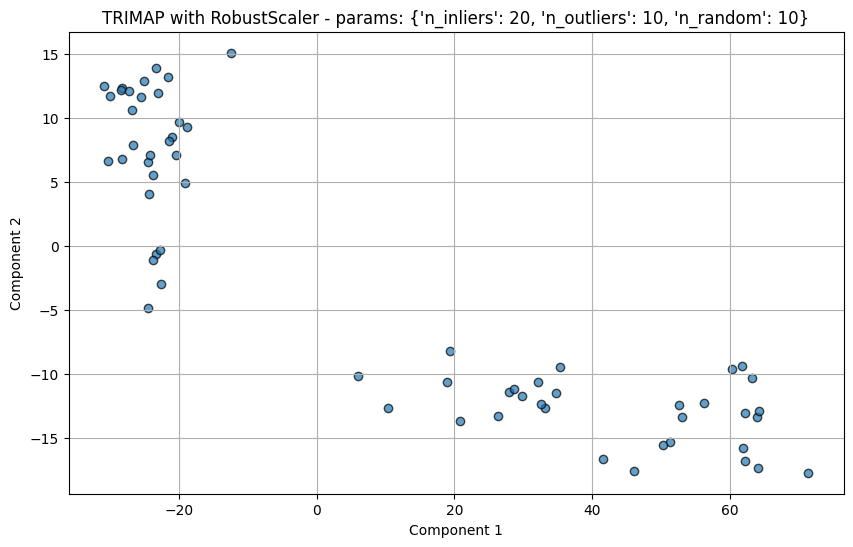

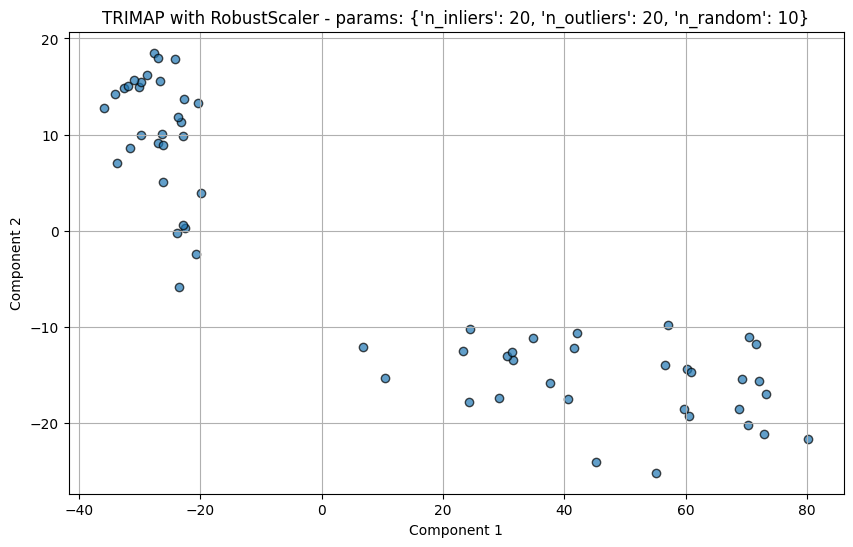

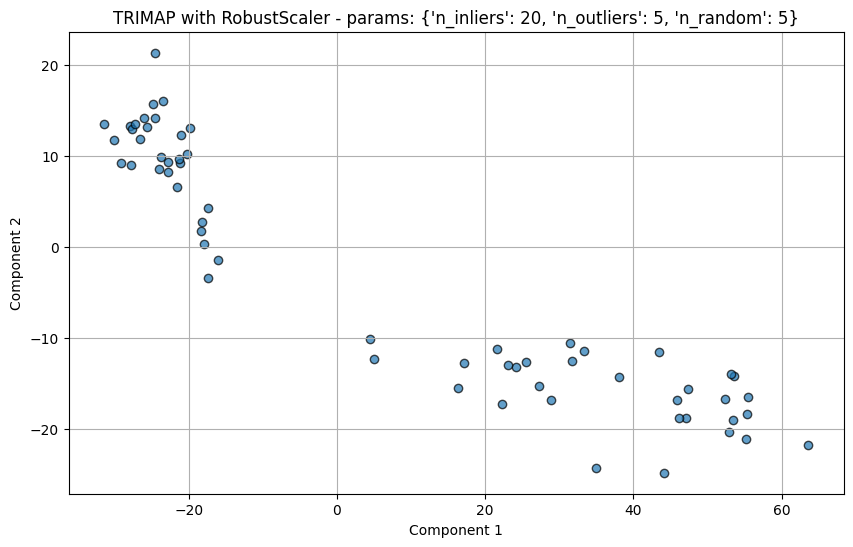

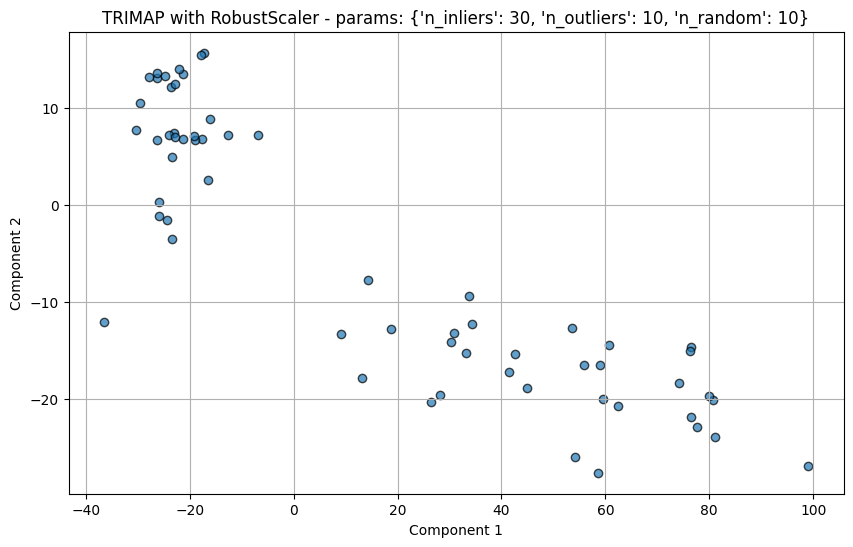

In [ ]:
from trimap import TRIMAP


params = [
    {},
    {"n_inliers": 10, "n_outliers": 10, "n_random": 20},
    {"n_inliers": 20, "n_outliers": 10, "n_random": 10},
    {"n_inliers": 20, "n_outliers": 20, "n_random": 10},
    {"n_inliers": 20, "n_outliers": 5, "n_random": 5},
    {"n_inliers": 30, "n_outliers": 10, "n_random": 10},
]
funky(TRIMAP, params, X)

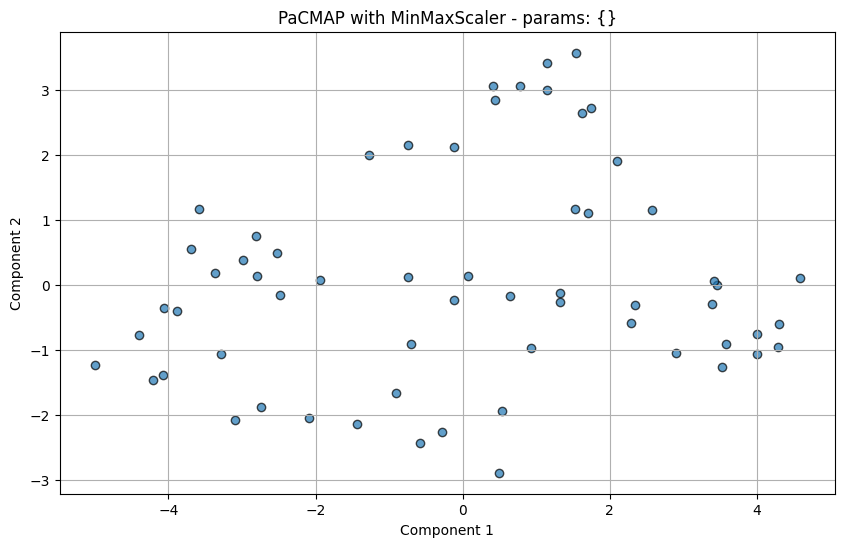

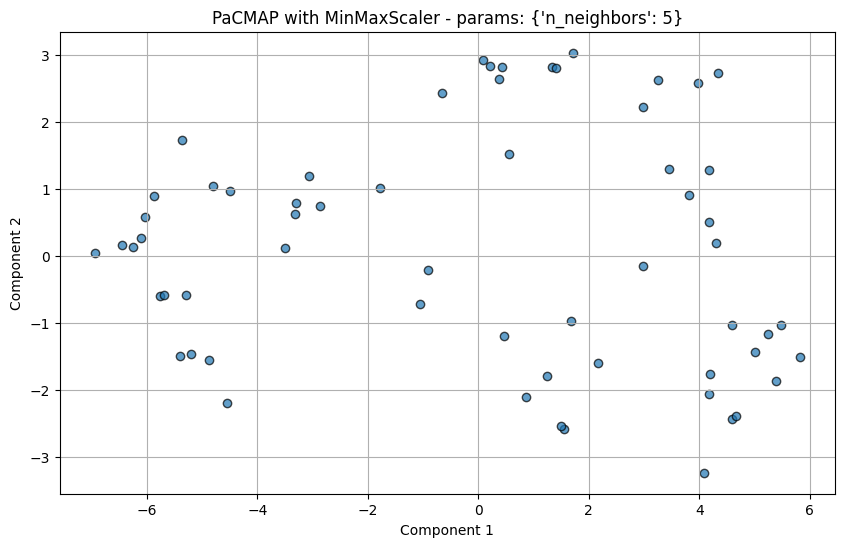

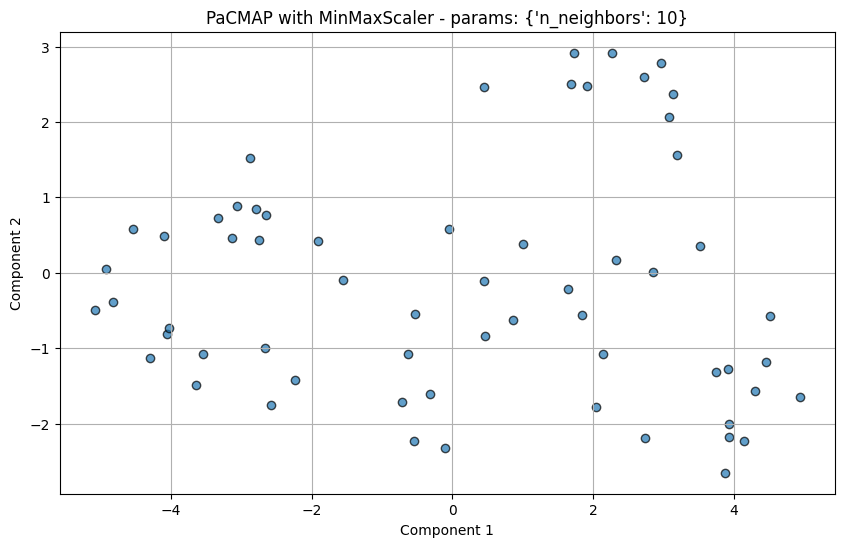

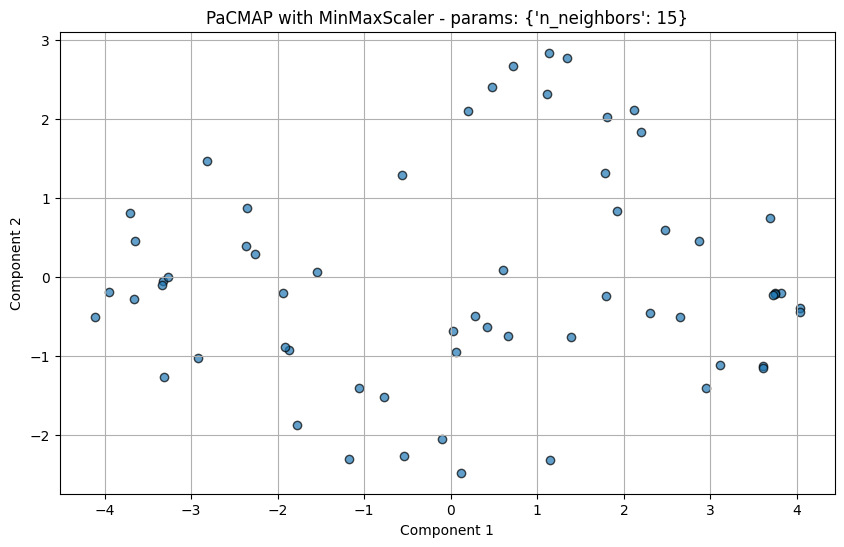

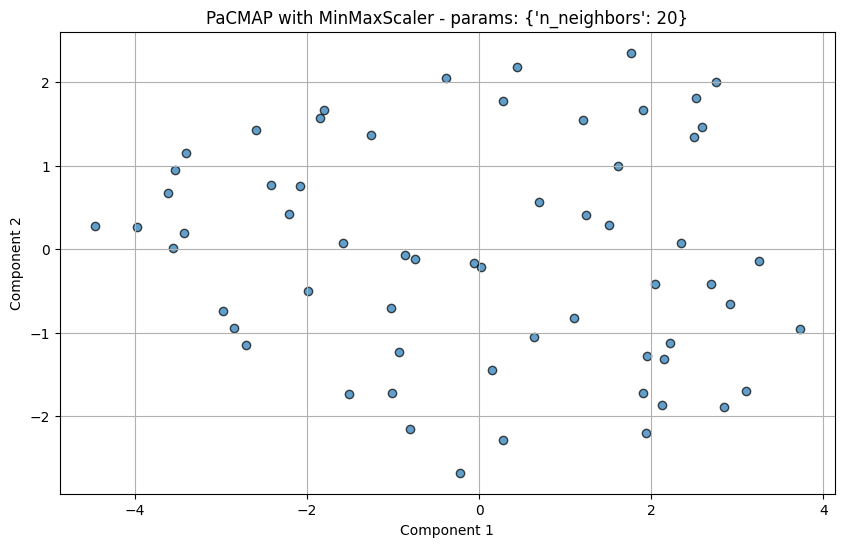

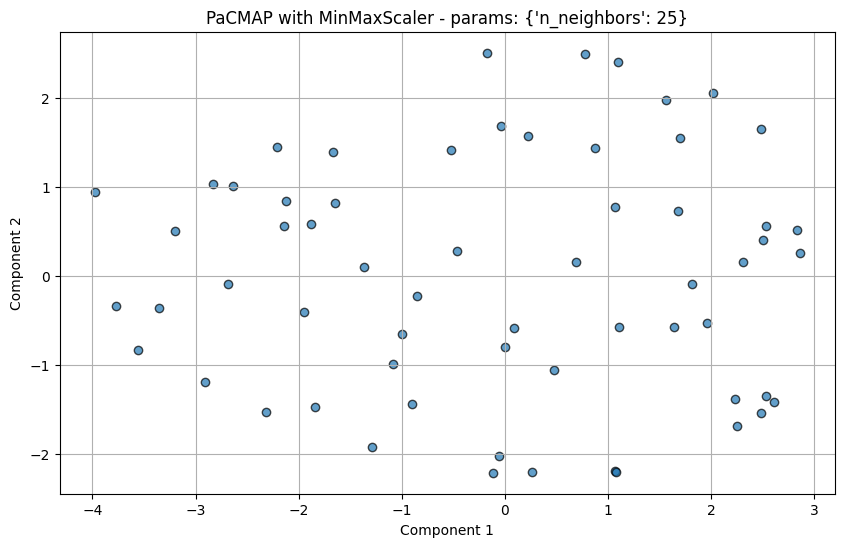

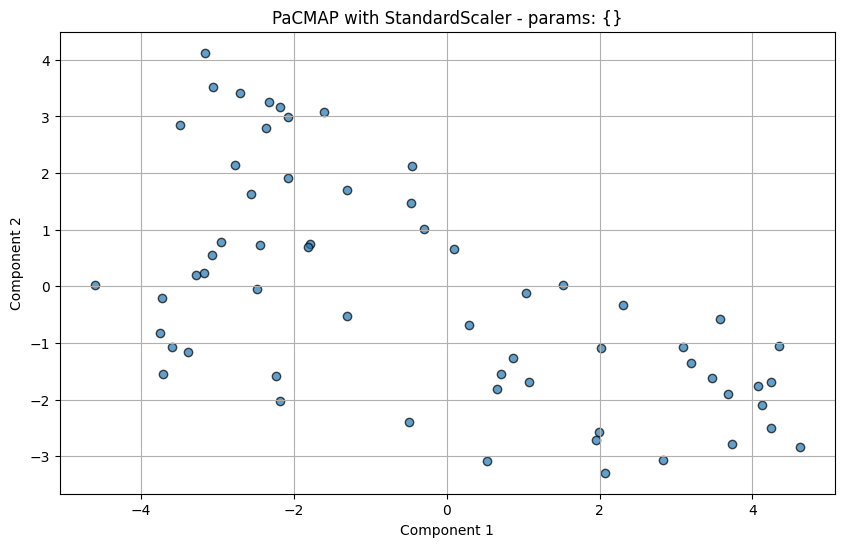

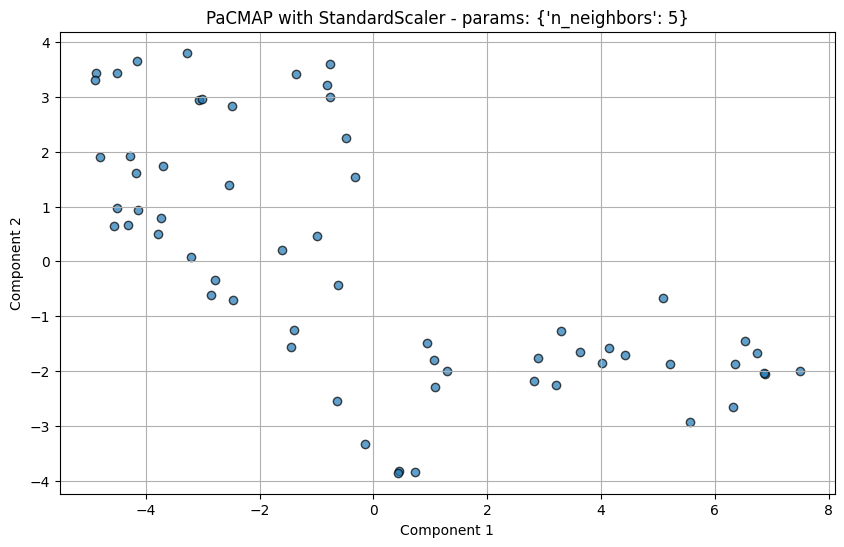

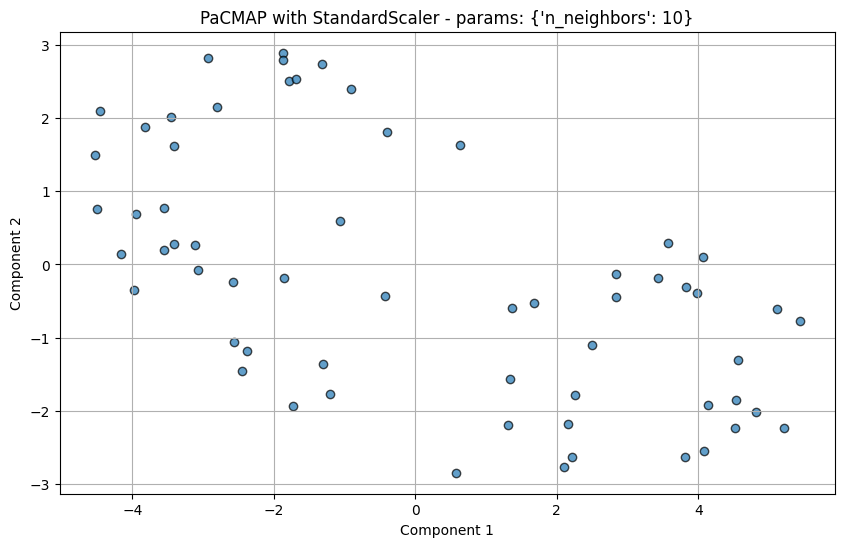

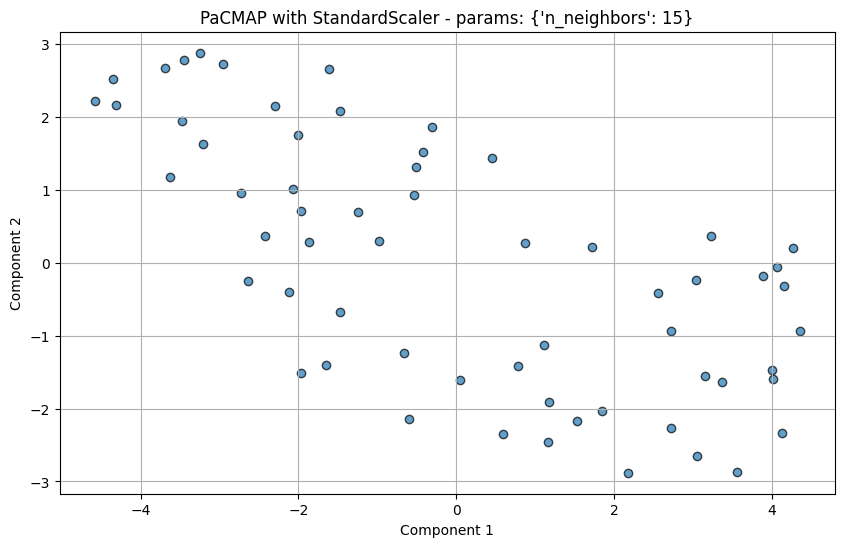

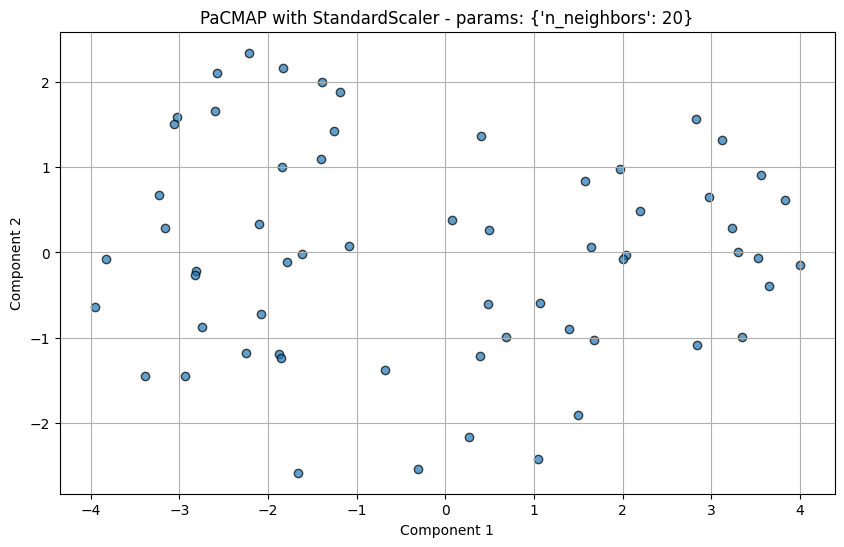

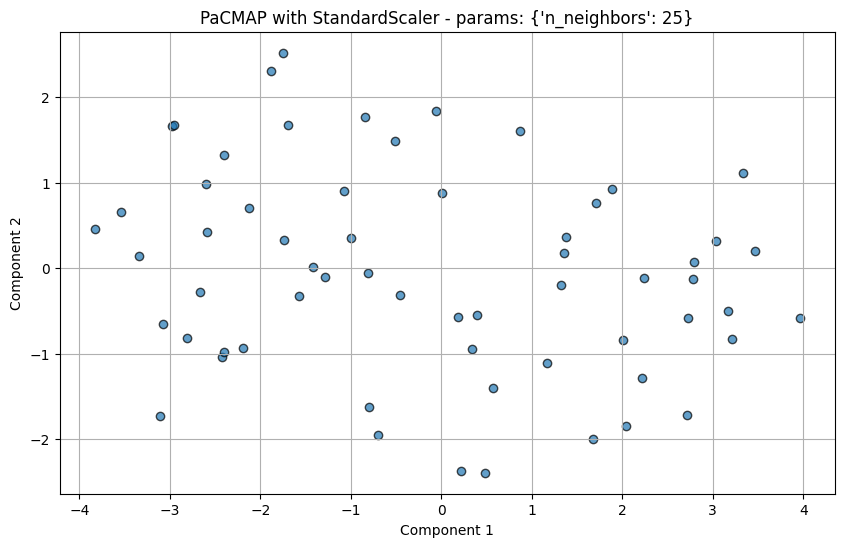

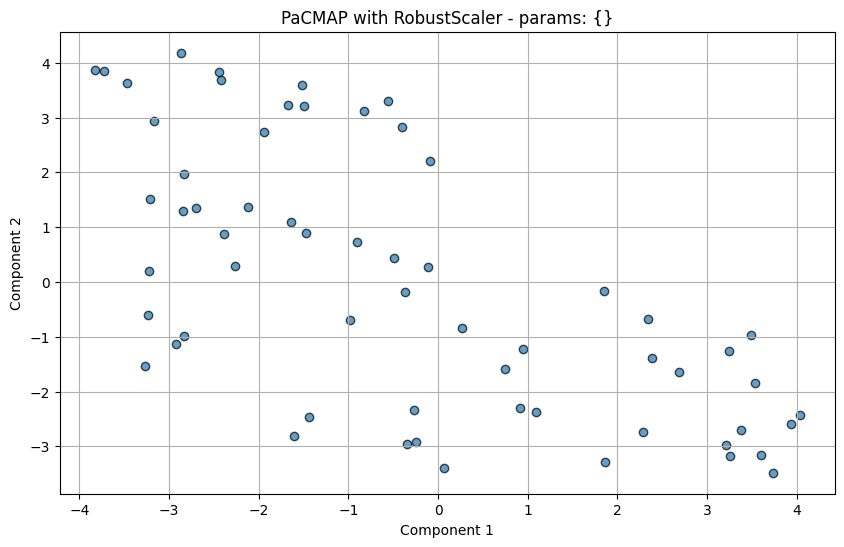

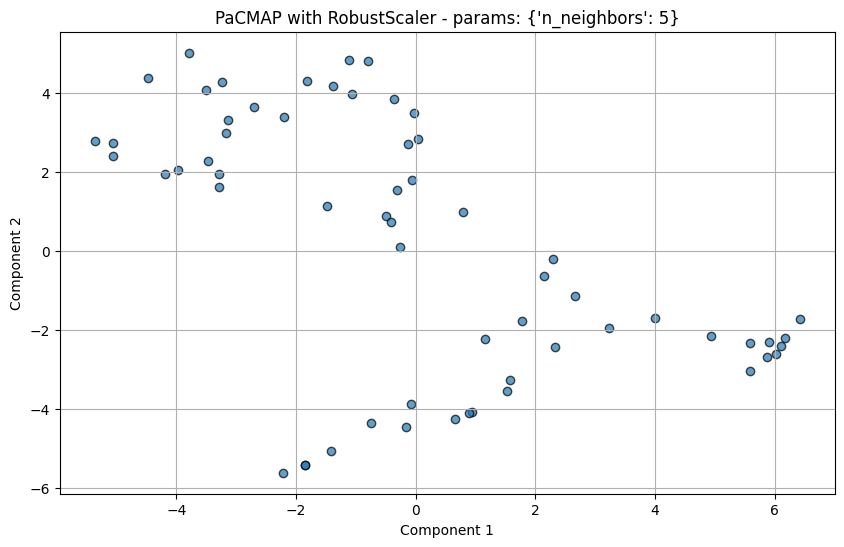

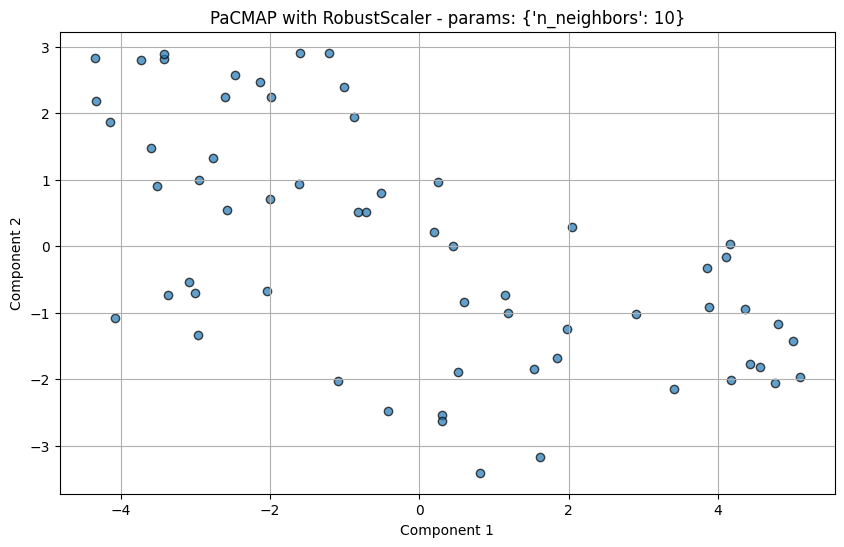

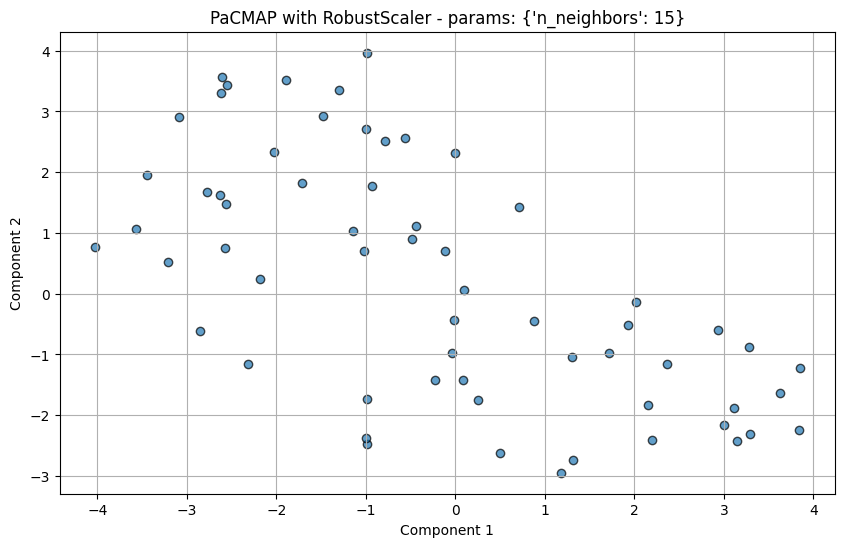

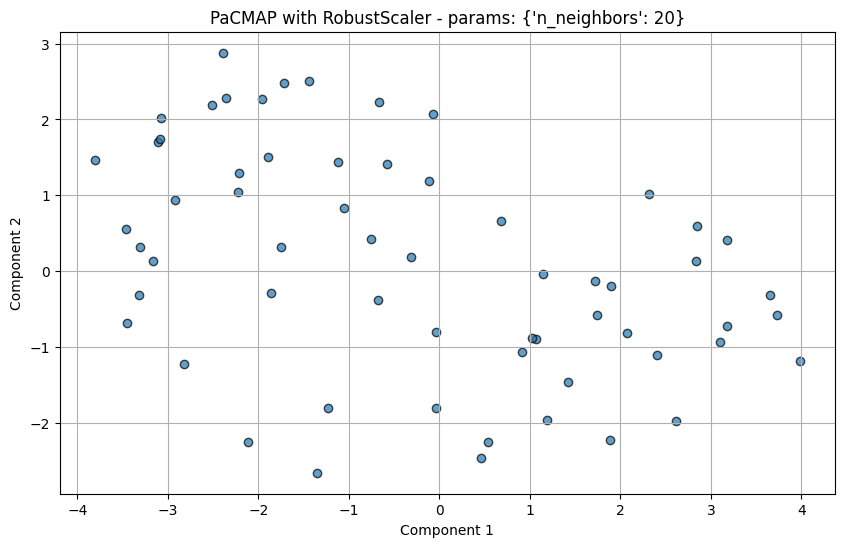

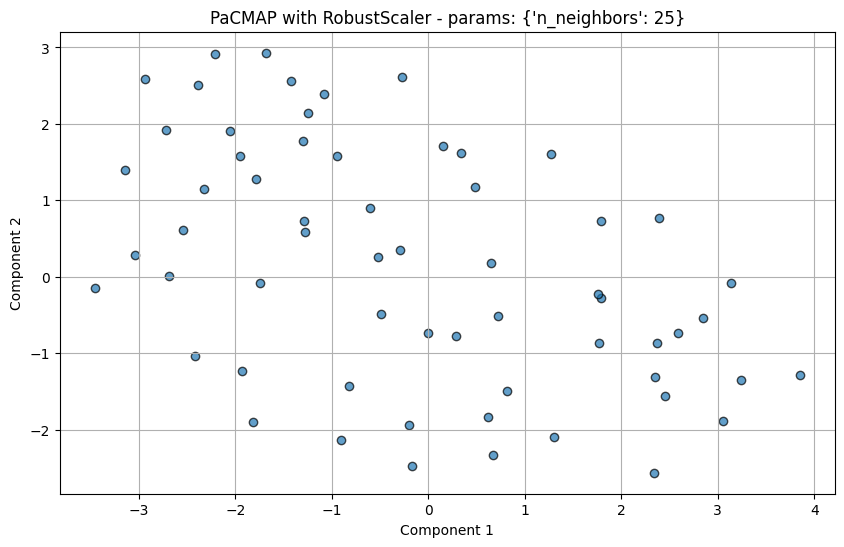

In [ ]:
from pacmap import PaCMAP


params = [
    {},  # Параметры по умолчанию
    {"n_neighbors": 5},
    {"n_neighbors": 10},
    {"n_neighbors": 15},
    {"n_neighbors": 20},
    {"n_neighbors": 25},
]
funky(PaCMAP, params, X)

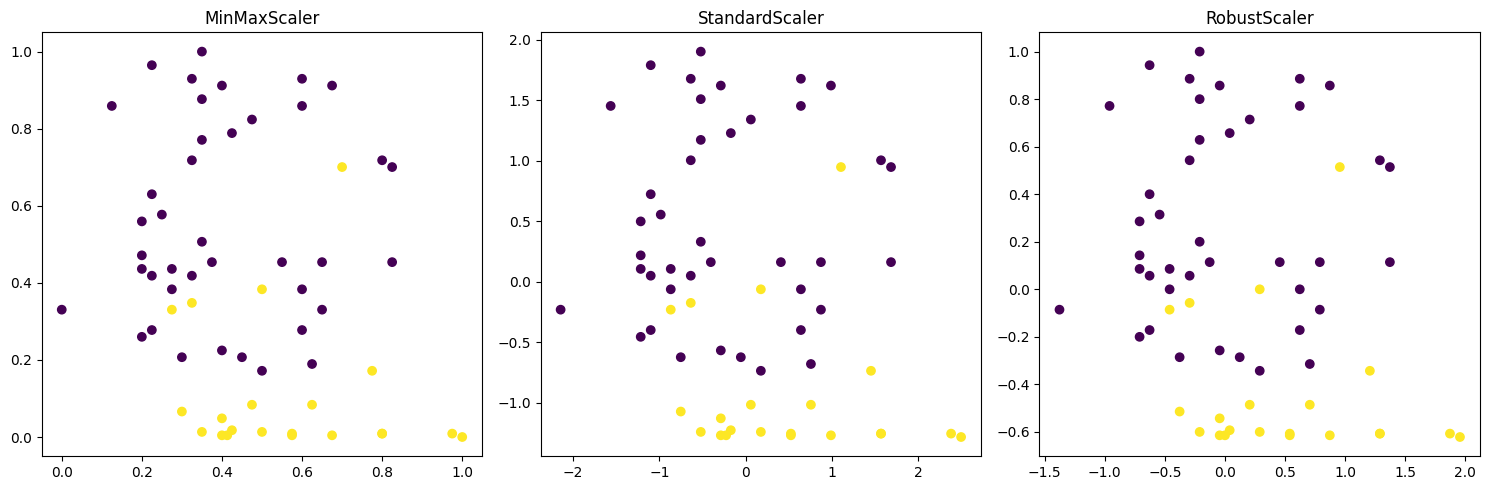

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
}

scaled_data = {}

for name, scaler in scalers.items():
    X_scaled = scaler.fit_transform(X)
    scaled_data[name] = X_scaled

fig, axs = plt.subplots(1, len(scalers), figsize=(15, 5))

for i, (name, data) in enumerate(scaled_data.items()):
    axs[i].scatter(data[:, 0], data[:, 1], c=y['alive'], cmap='viridis')
    axs[i].set_title(name)
    # axs[i].set_xlim([-2, 2])
    # axs[i].set_ylim([-2, 2])

plt.tight_layout()
plt.show()


**Задание №2**

In [ ]:
import pandas as pd

df = pd.read_csv("mammoth.csv")
df

,x,y,z
0,58.823,228.407,79.843
1,59.197,228.642,77.478
2,58.734,228.931,78.515
3,59.043,228.693,78.571
4,59.223,228.667,78.611
...,...,...,...
999773,45.775,313.390,117.697
999774,54.707,323.795,-80.527
999775,53.756,324.630,-83.203
999776,49.131,319.816,-26.200


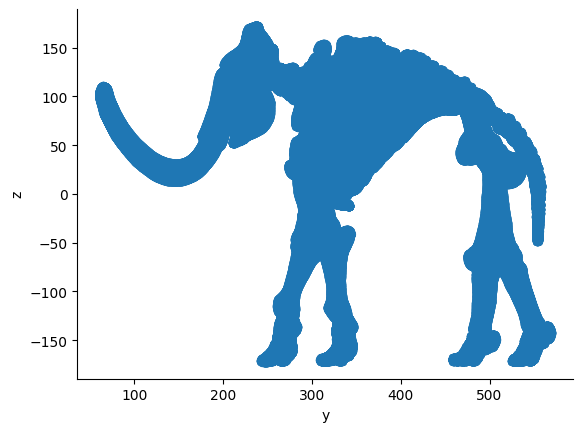

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='y', y='z', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


def funky2(method, params, X):
  scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
  }

  for scaler_name, scaler in scalers.items():
    X_sample = X.sample(n=10000, random_state=42).dropna()
    X_scaled = scaler.fit_transform(X_sample)
    for param in params:
      model = method(**param)
      X_embedded = model.fit_transform(X_scaled)
      visualization(X_embedded, f"{method.__name__} with {scaler_name} - params: {param}")

In [ ]:
from sklearn.manifold import TSNE


params = [
    {},  # Параметры по умолчанию
    {"n_components": 2, "perplexity": 10, "max_iter": 1000},
    {"n_components": 2, "perplexity": 25, "max_iter": 500},
    {"n_components": 2, "perplexity": 30, "max_iter": 1000},
    {"n_components": 2, "perplexity": 50, "max_iter": 1000},
    {"n_components": 2, "learning_rate": 100, "max_iter": 1000},
]
funky2(TSNE, params, df)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from umap import UMAP


params = [
    {},  # Параметры по умолчанию
    {"n_neighbors": 5, "min_dist": 0.01},
    {"n_neighbors": 10, "min_dist": 0.3},
    {"n_neighbors": 15, "min_dist": 0.1},
    {"n_neighbors": 30, "min_dist": 0.5},
    {"n_neighbors": 50, "min_dist": 0.01},
]
funky2(UMAP, params, df)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from trimap import TRIMAP


params = [
    {},
    {"n_inliers": 10, "n_outliers": 10, "n_random": 20},
    {"n_inliers": 20, "n_outliers": 10, "n_random": 10},
    {"n_inliers": 20, "n_outliers": 20, "n_random": 10},
    {"n_inliers": 20, "n_outliers": 5, "n_random": 5},
    {"n_inliers": 30, "n_outliers": 10, "n_random": 10},
]
funky2(TRIMAP, params, df)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from pacmap import PaCMAP


params = [
    {},  # Параметры по умолчанию
    {"n_neighbors": 5},
    {"n_neighbors": 10},
    {"n_neighbors": 15},
    {"n_neighbors": 20},
    {"n_neighbors": 25},
]
funky2(PaCMAP, params, df)

Output hidden; open in https://colab.research.google.com to view.